<a href="https://colab.research.google.com/github/sm3015/Financial-Model/blob/main/Randomforestregressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
!pip install simfin

In [78]:
import simfin as sf
import pandas as pd

In [79]:
sf.set_api_key('JKxFKoyHNRt3JGVjD6Tp1FGy2LMejBDd')

# Setup a place (local directory) to store the data
sf.set_data_dir('~/simfin_data/')


In [80]:
income_df = sf.load_income(variant = 'quarterly', market = 'us')
income_df

Dataset "us-income-quarterly" on disk (0 days old).
- Loading from disk ... 

/usr/local/lib/python3.11/dist-packages/simfin/load.py:154: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.



Done!


SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2019-07-31      45846      USD         2019            Q3   2019-08-30   
       2019-10-31      45846      USD         2019            Q4   2019-12-19   
       2020-01-31      45846      USD         2020            Q1   2020-03-03   
       2020-04-30      45846      USD         2020            Q2   2020-06-01   
       2020-07-31      45846      USD         2020            Q3   2020-09-01   
...                      ...      ...          ...           ...          ...   
ZYXI   2023-03-31     171401      USD         2023            Q1   2023-04-27   
       2023-06-30     171401      USD         2023            Q2   2023-07-27   
       2023-09-30     171401      USD         2023            Q3   2023-10-26   
       2023-12-31     171401      USD         2023            Q4   2024-03-12   
       2024-03-31     171401      USD         2024            Q1   2024-04-30   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2019-07-31     2019-08-30     312000000.0       316000000.0   
       2019-10-31     2019-08-30     309000000.0       313000000.0   
       2020-01-31     2021-03-02     310000000.0       313000000.0   
       2020-04-30     2021-06-01     309000000.0       312000000.0   
       2020-07-31     2021-09-01     309000000.0       312000000.0   
...                          ...             ...               ...   
ZYXI   2023-03-31     2024-04-30      36694000.0        37442000.0   
       2023-06-30     2024-07-25      36435000.0        37061000.0   
       2023-09-30     2024-10-24      35531000.0        36103000.0   
       2023-12-31     2024-10-24      33560000.0        33962000.0   
       2024-03-31     2024-04-30      32344000.0        32827000.0   

                         Revenue  Cost of Revenue  Gross Profit  \
Ticker Report Date                                                
A      2019-07-31   1.274000e+09     -582000000.0   692000000.0   
       2019-10-31   1.367000e+09     -630000000.0   737000000.0   
       2020-01-31   1.357000e+09     -634000000.0   723000000.0   
       2020-04-30   1.238000e+09     -581000000.0   657000000.0   
       2020-07-31   1.261000e+09     -592000000.0   669000000.0   
...                          ...              ...           ...   
ZYXI   2023-03-31   4.217000e+07       -9269000.0    32901000.0   
       2023-06-30   4.495200e+07       -9272000.0    35680000.0   
       2023-09-30   4.991500e+07       -9553000.0    40362000.0   
       2023-12-31   4.728500e+07      -10272000.0    37013000.0   
       2024-03-31   4.653100e+07       -9298000.0    37233000.0   

                    Operating Expenses  Selling, General & Administrative  \
Ticker Report Date                                                          
A      2019-07-31         -467000000.0                       -366000000.0   
       2019-10-31         -487000000.0                       -385000000.0   
       2020-01-31         -508000000.0                       -404000000.0   
       2020-04-30         -555000000.0                       -358000000.0   
       2020-07-31         -439000000.0                       -347000000.0   
...                                ...                                ...   
ZYXI   2023-03-31          -32617000.0                        -32617000.0   
       2023-06-30          -32967000.0                        -32967000.0   
       2023-09-30          -34877000.0                        -34877000.0   
       2023-12-31          -34715000.0                        -34715000.0   
       2024-03-31          -36708000.0                        -36708000.0   

                    Research & Development  Depreciation & Amortization  \
Ticker Report Date                                                        
A      2019-07-31             -

In [81]:
income_df = sf.load_income(variant = 'quarterly', market = 'us').reset_index()
income_df

cashflow_df = sf.load_cashflow(variant = 'quarterly', market = 'us').reset_index()
cashflow_df

balance_df = sf.load_balance(variant = 'quarterly', market = 'us').reset_index()
balance_df

Dataset "us-income-quarterly" on disk (0 days old).
- Loading from disk ... 

/usr/local/lib/python3.11/dist-packages/simfin/load.py:154: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.



Done!
Dataset "us-cashflow-quarterly" on disk (0 days old).
- Loading from disk ... 

/usr/local/lib/python3.11/dist-packages/simfin/load.py:154: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.



Done!
Dataset "us-balance-quarterly" on disk (0 days old).
- Loading from disk ... 

/usr/local/lib/python3.11/dist-packages/simfin/load.py:154: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.



Done!


,Ticker,Report Date,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity
0,A,2019-07-31,45846,USD,2019,Q3,2019-08-30,2019-08-30,312000000.0,316000000.0,1.765000e+09,856000000.0,660000000.0,3.457000e+09,839000000.0,99000000.0,4.230000e+09,5.168000e+09,8625000000,505105720.0,504000000.0,1.622000e+09,1.294000e+09,2.256000e+09,3.878000e+09,5.273000e+09,NaN,-122000000.0,4747000000,8625000000
1,A,2019-10-31,45846,USD,2019,Q4,2019-12-19,2020-12-18,309000000.0,313000000.0,1.382000e+09,930000000.0,679000000.0,3.189000e+09,850000000.0,102000000.0,5.311000e+09,6.263000e+09,9452000000,794000000.0,616000000.0,2.080000e+09,1.791000e+09,2.624000e+09,4.704000e+09,5.280000e+09,NaN,-18000000.0,4748000000,9452000000
2,A,2020-01-31,45846,USD,2020,Q1,2020-03-03,2020-03-03,310000000.0,313000000.0,1.226000e+09,966000000.0,706000000.0,3.102000e+09,844000000.0,118000000.0,5.437000e+09,6.399000e+09,9501000000,584982073.0,675000000.0,1.892000e+09,1.787000e+09,2.761000e+09,4.653000e+09,5.296000e+09,NaN,73000000.0,4848000000,9501000000
3,A,2020-04-30,45846,USD,2020,Q2,2020-06-01,2020-06-01,309000000.0,312000000.0,1.324000e+09,886000000.0,750000000.0,3.171000e+09,836000000.0,141000000.0,5.307000e+09,6.284000e+09,9455000000,566494380.0,700000000.0,1.945000e+09,1.788000e+09,2.742000e+09,4.687000e+09,5.291000e+09,NaN,15000000.0,4768000000,9455000000
4,A,2020-07-31,45846,USD,2020,Q3,2020-09-01,2020-09-01,309000000.0,312000000.0,1.358000e+09,930000000.0,746000000.0,3.245000e+09,846000000.0,148000000.0,5.307000e+09,6.301000e+09,9546000000,569891083.0,40000000.0,1.314000e+09,2.283000e+09,3.251000e+09,4.565000e+09,5.327000e+09,NaN,130000000.0,4981000000,9546000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54815,ZYXI,2023-03-31,171401,USD,2023,Q1,2023-04-27,2023-04-27,36694000.0,37442000.0,1.679200e+07,32060000.0,14184000.0,6.516600e+07,14152667.0,NaN,4.360900e+07,4.589000e+07,111056000,13596000.0,7471794.0,2.105900e+07,1.693596e+07,2.551100e+07,4.657000e+07,8.238200e+07,-36513000.0,18617000.0,64486000,111056000
54816,ZYXI,2023-06-30,171401,USD,2023,Q2,2023-07-27,2023-07-27,36435000.0,37061000.0,5.874900e+07,32957000.0,14325000.0,1.075600e+08,13272464.0,NaN,4.263600e+07,4.500900e+07,152569000,12052000.0,2038254.0,1.409500e+07,6.936668e+07,7.620700e+07,9.030200e+07,8.292400e+07,-42628000.0,21971000.0,62267000,152569000
54817,ZYXI,2023-09-30,171401,USD,2023,Q3,2023-10-26,2023-10-26,35531000.0,36103000.0,5.244100e+07,33288000.0,14186000.0,1.029230e+08,15637013.0,NaN,4.603800e+07,4.850600e+07,151429000,16561000.0,3281046.0,1.984300e+07,7.304367e+07,7.300400e+07,9.284700e+07,9.057700e+07,-57560000.0,25565000.0,58582000,151429000
54818,ZYXI,2023-12-31,171401,USD,2023,Q4,2024-03-12,2025-03-11,33560000.0,33962000.0,4.457900e+07,26838000.0,13106000.0,8.785500e+07,15647777.0,NaN,4.593500e+07,4.904900e+07,136904000,14607000.0,3933086.0,1.853200e+07,7.208885e+07,7.224300e+07,9.077500e+07,9.091100e+07,-71562000.0,26780000.0,46129000,136904000


In [82]:
income_df.info()
balance_df.info()
cashflow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54824 entries, 0 to 54823
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Ticker                                    54824 non-null  object        
 1   Report Date                               54824 non-null  datetime64[ns]
 2   SimFinId                                  54824 non-null  int64         
 3   Currency                                  54824 non-null  object        
 4   Fiscal Year                               54824 non-null  int64         
 5   Fiscal Period                             54824 non-null  object        
 6   Publish Date                              54824 non-null  datetime64[ns]
 7   Restated Date                             54824 non-null  datetime64[ns]
 8   Shares (Basic)                            54577 non-null  float64       
 9   Shares (Diluted)            

# New Section

In [83]:
# Let's obtain general information about U.S. companies such as company name and ticker symbol
# Note that SimFinId is a unique identifier for each company
# The IndustryId column contains information about the sector and the industry
# The first 3 digits of the IndustryId column represents a sector and the last 3 digits represents the industry
# The mapping of the Industry IDs to the sector and industry is available in a different dataset
# This technique is used to ensure efficiency and to avoid downloading a large amount of data

companies_info_df = pd.read_csv('companies_information.csv')
companies_info_df

,Ticker,SimFinId,Company Name,IndustryId
0,A,45846,AGILENT TECHNOLOGIES INC,106001.0
1,A21,1333027,Li Auto Inc.,NaN
2,AA,367153,Alcoa Corp,110004.0
3,AAL,68568,American Airlines Group Inc.,100006.0
4,AAMC,847094,Altisource Asset Management Corp,104001.0
...,...,...,...,...
3117,ZUO,994625,ZUORA INC,101003.0
3118,ZVO,901866,Zovio Inc,102006.0
3119,ZY,1243193,Zymergen Inc.,106002.0
3120,ZYNE,901704,"Zynerba Pharmaceuticals, Inc.",106002.0


In [84]:
industries_info_df = pd.read_csv('industries_information.csv')
industries_info_df.head(70)

,IndustryId,Sector,Industry
0,100001,Industrials,Industrial Products
1,100002,Industrials,Business Services
2,100003,Industrials,Engineering & Construction
3,100004,Industrials,Waste Management
4,100005,Industrials,Industrial Distribution
...,...,...,...
65,109002,Real Estate,Real Estate Services
66,110001,Basic Materials,Chemicals
67,110002,Basic Materials,Forest Products
68,110003,Basic Materials,Agriculture


In [85]:
# Let's use Pandas to read the the CSV file that contains industries information
# The IndustryId column contains information about the sector and the industry
# The first 3 digits of the IndustryId column represents a sector and the last 3 digits represents the industry
# Let's set the maximum number of rows to be displayed in a Pandas DataFrame to 70
# Note that the "Consumer Defensive" sector offers stable returns regardless of the state of the stock market
# While "Consumer Cyclical" sector includes impulse and convenience goods such as cars, apparel, entertainment and travel
pd.options.display.max_rows = 10
industries_info_df.head(10)

,IndustryId,Sector,Industry
0,100001,Industrials,Industrial Products
1,100002,Industrials,Business Services
2,100003,Industrials,Engineering & Construction
3,100004,Industrials,Waste Management
4,100005,Industrials,Industrial Distribution
5,100006,Industrials,Airlines
6,100007,Industrials,Consulting & Outsourcing
7,100008,Industrials,Aerospace & Defense
8,100009,Industrials,Farm & Construction Machinery
9,100010,Industrials,Transportation & Logistics


In [86]:
# Let's merge industries and companies information using the left join
# Note that left join returns all rows from the left DataFrame, and any rows with matching keys from the right DataFrame.
# When there is no matching from right DataFrame, NaN will be returned

companies_industries_df = pd.merge(companies_info_df, industries_info_df, on = 'IndustryId', how = 'left')
companies_industries_df


,Ticker,SimFinId,Company Name,IndustryId,Sector,Industry
0,A,45846,AGILENT TECHNOLOGIES INC,106001.0,Healthcare,Medical Diagnostics & Research
1,A21,1333027,Li Auto Inc.,NaN,NaN,NaN
2,AA,367153,Alcoa Corp,110004.0,Basic Materials,Metals & Mining
3,AAL,68568,American Airlines Group Inc.,100006.0,Industrials,Airlines
4,AAMC,847094,Altisource Asset Management Corp,104001.0,Financial Services,Asset Management
...,...,...,...,...,...,...
3117,ZUO,994625,ZUORA INC,101003.0,Technology,Application Software
3118,ZVO,901866,Zovio Inc,102006.0,Consumer Defensive,Education
3119,ZY,1243193,Zymergen Inc.,106002.0,Healthcare,Biotechnology
3120,ZYNE,901704,"Zynerba Pharmaceuticals, Inc.",106002.0,Healthcare,Biotechnology


In [87]:
# Let's read the Earnings-per-share (EPS) dataset
# Note that EPS is the target column when we train our machine learning model
eps_df = pd.read_csv('eps_df.csv')
eps_df

,"Earnings Per Share, Basic",Ticker,Fiscal Year,Fiscal Period
0,0.52174,A,2017,Q1
1,0.51090,A,2017,Q2
2,0.54517,A,2017,Q3
3,0.54630,A,2017,Q4
4,-0.99071,A,2018,Q1
...,...,...,...,...
51199,0.15951,ZYXI,2021,Q3
51200,0.26031,ZYXI,2021,Q4
51201,0.03259,ZYXI,2022,Q1
51202,0.08612,ZYXI,2022,Q2


In [88]:
# Now let's merge all Pandas DataFrames together
# Let's drop duplicate columns across the 3 financial statements
cashflow_df = cashflow_df.drop(columns = ['Report Date',
                                          'Currency',
                                          'Publish Date',
                                          'Restated Date',
                                          'Shares (Basic)',
                                          'Shares (Diluted)',
                                          'Depreciation & Amortization'])
cashflow_df

,Ticker,SimFinId,Fiscal Year,Fiscal Period,Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Change in Accounts Receivable,Change in Inventories,Change in Accounts Payable,Change in Other,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
0,A,45846,2019,Q3,191000000.0,29000000.0,-33000000.0,-41000000.0,-10000000.0,8000000.0,10000000.0,242000000.0,-47000000.0,NaN,0.000000e+00,-5.100000e+07,-51000000.0,0.0,-550210245.0,-582000000.0,-390000000
1,A,45846,2019,Q4,194000000.0,42000000.0,8017781.0,-48000000.0,-5000000.0,29000000.0,26000000.0,314000000.0,-30000000.0,NaN,-1.160000e+09,-1.193000e+09,-51000000.0,600000000.0,-48959576.0,497000000.0,-383000000
2,A,45846,2020,Q1,197000000.0,27000000.0,-362000000.0,-40000000.0,-32000000.0,-15000000.0,-275000000.0,-59000000.0,-34000000.0,NaN,NaN,-3.500000e+07,-56000000.0,56000000.0,-60070173.0,-61000000.0,-156000000
3,A,45846,2020,Q2,101000000.0,98000000.0,38000000.0,65000000.0,-53000000.0,5000000.0,21000000.0,313000000.0,-33000000.0,NaN,NaN,-5.300000e+07,-55000000.0,25000000.0,-126000000.0,-156000000.0,97000000
4,A,45846,2020,Q3,199000000.0,34000000.0,-20000000.0,-24000000.0,-1000000.0,-25000000.0,30000000.0,290000000.0,-24000000.0,NaN,NaN,-3.200000e+07,-56000000.0,-161000000.0,-32923243.0,-231000000.0,35000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54818,ZYXI,171401,2023,Q1,1569000.0,-951000.0,472000.0,NaN,NaN,NaN,NaN,1934000.0,-174000.0,NaN,NaN,-1.740000e+05,NaN,-1364000.0,-3326000.0,-5112000.0,-3352000
54819,ZYXI,171401,2023,Q2,3354000.0,-1673000.0,-2027000.0,NaN,NaN,NaN,NaN,741000.0,-210000.0,NaN,NaN,-2.100000e+05,-1000.0,47661000.0,-6110000.0,41426000.0,41957000
54820,ZYXI,171401,2023,Q3,3594000.0,241000.0,3927000.0,NaN,NaN,NaN,NaN,8893000.0,-196000.0,NaN,NaN,-1.000600e+07,0.0,-41000.0,-14933000.0,-15119000.0,-16232000
54821,ZYXI,171401,2023,Q4,1215000.0,106000.0,3709000.0,NaN,NaN,NaN,NaN,6188000.0,-576000.0,NaN,NaN,9.424000e+06,-2000.0,-33000.0,-13469000.0,-13550000.0,2062000


In [89]:
# Let's drop duplicate columns in the balance sheet statements
balance_df = balance_df.drop(columns = ['Report Date',
                                        'Currency',
                                        'Publish Date',
                                        'Restated Date',
                                        'Shares (Basic)',
                                        'Shares (Diluted)'])
balance_df

,Ticker,SimFinId,Fiscal Year,Fiscal Period,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity
0,A,45846,2019,Q3,1.765000e+09,856000000.0,660000000.0,3.457000e+09,839000000.0,99000000.0,4.230000e+09,5.168000e+09,8625000000,505105720.0,504000000.0,1.622000e+09,1.294000e+09,2.256000e+09,3.878000e+09,5.273000e+09,NaN,-122000000.0,4747000000,8625000000
1,A,45846,2019,Q4,1.382000e+09,930000000.0,679000000.0,3.189000e+09,850000000.0,102000000.0,5.311000e+09,6.263000e+09,9452000000,794000000.0,616000000.0,2.080000e+09,1.791000e+09,2.624000e+09,4.704000e+09,5.280000e+09,NaN,-18000000.0,4748000000,9452000000
2,A,45846,2020,Q1,1.226000e+09,966000000.0,706000000.0,3.102000e+09,844000000.0,118000000.0,5.437000e+09,6.399000e+09,9501000000,584982073.0,675000000.0,1.892000e+09,1.787000e+09,2.761000e+09,4.653000e+09,5.296000e+09,NaN,73000000.0,4848000000,9501000000
3,A,45846,2020,Q2,1.324000e+09,886000000.0,750000000.0,3.171000e+09,836000000.0,141000000.0,5.307000e+09,6.284000e+09,9455000000,566494380.0,700000000.0,1.945000e+09,1.788000e+09,2.742000e+09,4.687000e+09,5.291000e+09,NaN,15000000.0,4768000000,9455000000
4,A,45846,2020,Q3,1.358000e+09,930000000.0,746000000.0,3.245000e+09,846000000.0,148000000.0,5.307000e+09,6.301000e+09,9546000000,569891083.0,40000000.0,1.314000e+09,2.283000e+09,3.251000e+09,4.565000e+09,5.327000e+09,NaN,130000000.0,4981000000,9546000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54815,ZYXI,171401,2023,Q1,1.679200e+07,32060000.0,14184000.0,6.516600e+07,14152667.0,NaN,4.360900e+07,4.589000e+07,111056000,13596000.0,7471794.0,2.105900e+07,1.693596e+07,2.551100e+07,4.657000e+07,8.238200e+07,-36513000.0,18617000.0,64486000,111056000
54816,ZYXI,171401,2023,Q2,5.874900e+07,32957000.0,14325000.0,1.075600e+08,13272464.0,NaN,4.263600e+07,4.500900e+07,152569000,12052000.0,2038254.0,1.409500e+07,6.936668e+07,7.620700e+07,9.030200e+07,8.292400e+07,-42628000.0,21971000.0,62267000,152569000
54817,ZYXI,171401,2023,Q3,5.244100e+07,33288000.0,14186000.0,1.029230e+08,15637013.0,NaN,4.603800e+07,4.850600e+07,151429000,16561000.0,3281046.0,1.984300e+07,7.304367e+07,7.300400e+07,9.284700e+07,9.057700e+07,-57560000.0,25565000.0,58582000,151429000
54818,ZYXI,171401,2023,Q4,4.457900e+07,26838000.0,13106000.0,8.785500e+07,15647777.0,NaN,4.593500e+07,4.904900e+07,136904000,14607000.0,3933086.0,1.853200e+07,7.208885e+07,7.224300e+07,9.077500e+07,9.091100e+07,-71562000.0,26780000.0,46129000,136904000


In [90]:
# Let's display the income_df Pandas DataFrame
income_df

,Ticker,Report Date,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Depreciation & Amortization,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
0,A,2019-07-31,45846,USD,2019,Q3,2019-08-30,2019-08-30,312000000.0,316000000.0,1.274000e+09,-582000000.0,692000000.0,-467000000.0,-366000000.0,-101000000.0,NaN,225000000.0,-3000000.0,-8000000.0,222000000.0,NaN,222000000.0,-31000000.0,191000000,NaN,191000000,191000000
1,A,2019-10-31,45846,USD,2019,Q4,2019-12-19,2019-08-30,309000000.0,313000000.0,1.367000e+09,-630000000.0,737000000.0,-487000000.0,-385000000.0,-102000000.0,NaN,250000000.0,-19000000.0,-15000000.0,231000000.0,NaN,231000000.0,-37000000.0,194000000,NaN,194000000,194000000
2,A,2020-01-31,45846,USD,2020,Q1,2020-03-03,2021-03-02,310000000.0,313000000.0,1.357000e+09,-634000000.0,723000000.0,-508000000.0,-404000000.0,-104000000.0,NaN,215000000.0,4000000.0,-17000000.0,219000000.0,NaN,219000000.0,-22000000.0,197000000,NaN,197000000,197000000
3,A,2020-04-30,45846,USD,2020,Q2,2020-06-01,2021-06-01,309000000.0,312000000.0,1.238000e+09,-581000000.0,657000000.0,-555000000.0,-358000000.0,-197000000.0,NaN,102000000.0,19000000.0,-17000000.0,121000000.0,NaN,121000000.0,-20000000.0,101000000,NaN,101000000,101000000
4,A,2020-07-31,45846,USD,2020,Q3,2020-09-01,2021-09-01,309000000.0,312000000.0,1.261000e+09,-592000000.0,669000000.0,-439000000.0,-347000000.0,-92000000.0,NaN,230000000.0,-11000000.0,-18000000.0,219000000.0,NaN,219000000.0,-20000000.0,199000000,NaN,199000000,199000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54819,ZYXI,2023-03-31,171401,USD,2023,Q1,2023-04-27,2024-04-30,36694000.0,37442000.0,4.217000e+07,-9269000.0,32901000.0,-32617000.0,-32617000.0,NaN,NaN,284000.0,-84000.0,-84000.0,1601352.0,1398000.0,1598000.0,-33000.0,1565000,NaN,1565000,1565000
54820,ZYXI,2023-06-30,171401,USD,2023,Q2,2023-07-27,2024-07-25,36435000.0,37061000.0,4.495200e+07,-9272000.0,35680000.0,-32967000.0,-32967000.0,NaN,NaN,2713000.0,-317000.0,-317000.0,4097047.0,1700000.0,4096000.0,-742000.0,3354000,NaN,3354000,3354000
54821,ZYXI,2023-09-30,171401,USD,2023,Q3,2023-10-26,2024-10-24,35531000.0,36103000.0,4.991500e+07,-9553000.0,40362000.0,-34877000.0,-34877000.0,NaN,NaN,5485000.0,-327000.0,-327000.0,5158000.0,-208000.0,4950000.0,-1356000.0,3594000,NaN,3594000,3594000
54822,ZYXI,2023-12-31,171401,USD,2023,Q4,2024-03-12,2024-10-24,33560000.0,33962000.0,4.728500e+07,-10272000.0,37013000.0,-34715000.0,-34715000.0,NaN,NaN,2298000.0,-366000.0,-366000.0,1932000.0,-1000.0,1931000.0,-716000.0,1215000,NaN,1215000,1215000


In [91]:
# Let's merge income statement, cashflow statement, balance sheet, EPS with the financial data
merged_df = companies_industries_df.merge(income_df, on = ['Ticker','SimFinId'], how = 'left')\
                                   .merge(cashflow_df, on = ['Ticker','SimFinId', 'Fiscal Year','Fiscal Period'], how = 'left')\
                                   .merge(balance_df, on = ['Ticker','SimFinId','Fiscal Year','Fiscal Period'], how = 'left')\
                                   .merge(eps_df, on = ['Ticker','Fiscal Year','Fiscal Period'], how = 'left')
merged_df

,Ticker,SimFinId,Company Name,IndustryId,Sector,Industry,Report Date,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Depreciation & Amortization,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Change in Accounts Receivable,Change in Inventories,Change in Accounts Payable,Change in Other,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity,"Earnings Per Share, Basic"
0,A,45846,AGILENT TECHNOLOGIES INC,106001.0,Healthcare,Medical Diagnostics & Research,2019-07-31,USD,2019.0,Q3,2019-08-30,2019-08-30,312000000.0,316000000.0,1.274000e+09,-582000000.0,692000000.0,-467000000.0,-366000000.0,-101000000.0,NaN,225000000.0,-3000000.0,-8000000.0,222000000.0,NaN,222000000.0,-31000000.0,191000000.0,NaN,191000000.0,191000000.0,191000000.0,29000000.0,-33000000.0,-41000000.0,-10000000.0,8000000.0,10000000.0,242000000.0,-47000000.0,NaN,0.000000e+00,-5.100000e+07,-51000000.0,0.0,-550210245.0,-582000000.0,-390000000.0,1.765000e+09,856000000.0,660000000.0,3.457000e+09,839000000.0,99000000.0,4.230000e+09,5.168000e+09,8.625000e+09,505105720.0,504000000.0,1.622000e+09,1.294000e+09,2.256000e+09,3.878000e+09,5.273000e+09,NaN,-122000000.0,4.747000e+09,8.625000e+09,0.61022
1,A,45846,AGILENT TECHNOLOGIES INC,106001.0,Healthcare,Medical Diagnostics & Research,2019-10-31,USD,2019.0,Q4,2019-12-19,2019-08-30,309000000.0,313000000.0,1.367000e+09,-630000000.0,737000000.0,-487000000.0,-385000000.0,-102000000.0,NaN,250000000.0,-19000000.0,-15000000.0,231000000.0,NaN,231000000.0,-37000000.0,194000000.0,NaN,194000000.0,194000000.0,194000000.0,42000000.0,8017781.0,-48000000.0,-5000000.0,29000000.0,26000000.0,314000000.0,-30000000.0,NaN,-1.160000e+09,-1.193000e+09,-51000000.0,600000000.0,-48959576.0,497000000.0,-383000000.0,1.382000e+09,930000000.0,679000000.0,3.189000e+09,850000000.0,102000000.0,5.311000e+09,6.263000e+09,9.452000e+09,794000000.0,616000000.0,2.080000e+09,1.791000e+09,2.624000e+09,4.704000e+09,5.280000e+09,NaN,-18000000.0,4.748000e+09,9.452000e+09,0.62987
2,A,45846,AGILENT TECHNOLOGIES INC,106001.0,Healthcare,Medical Diagnostics & Research,2020-01-31,USD,2020.0,Q1,2020-03-03,2021-03-02,310000000.0,313000000.0,1.357000e+09,-634000000.0,723000000.0,-508000000.0,-404000000.0,-104000000.0,NaN,215000000.0,4000000.0,-17000000.0,219000000.0,NaN,219000000.0,-22000000.0,197000000.0,NaN,197000000.0,197000000.0,197000000.0,27000000.0,-362000000.0,-40000000.0,-32000000.0,-15000000.0,-275000000.0,-59000000.0,-34000000.0,NaN,NaN,-3.500000e+07,-56000000.0,56000000.0,-60070173.0,-61000000.0,-156000000.0,1.226000e+09,966000000.0,706000000.0,3.102000e+09,844000000.0,118000000.0,5.437000e+09,6.399000e+09,9.501000e+09,584982073.0,675000000.0,1.892000e+09,1.787000e+09,2.761000e+09,4.653000e+09,5.296000e+09,NaN,73000000.0,4.848000e+09,9.501000e+09,0.63548
3,A,45846,AGILENT TECHNOLOG

In [92]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36163 entries, 0 to 36162
Data columns (total 70 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Ticker                                           36163 non-null  object        
 1   SimFinId                                         36163 non-null  int64         
 2   Company Name                                     36163 non-null  object        
 3   IndustryId                                       33868 non-null  float64       
 4   Sector                                           33868 non-null  object        
 5   Industry                                         33868 non-null  object        
 6   Report Date                                      35344 non-null  datetime64[ns]
 7   Currency                                         35344 non-null  object        
 8   Fiscal Year                         

In [93]:
merged_df = merged_df.drop(columns = ['SimFinId','IndustryId'])
# Check out the shape of the merged Pandas DataFrame
# The shape property is used to obtain the number of rows and columns in a Pandas DataFrame
merged_df.shape


(36163, 68)

In [94]:
len(merged_df['Ticker'].unique().tolist())

# Let's obtain a Python List containing unique ticker symbols
merged_df['Ticker'].unique().tolist()

['A',
 'A21',
 'AA',
 'AAL',
 'AAMC',
 'AAME',
 'AAN',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AAWW',
 'ABAX',
 'ABBV',
 'ABC',
 'ABCB',
 'ABCD',
 'ABCL',
 'ABEO',
 'ABG',
 'ABIO',
 'ABM',
 'ABMC',
 'ABMD',
 'ABNB',
 'ABR',
 'ABSI',
 'ABT',
 'ABTL',
 'ABTX',
 'ABUS',
 'ABX',
 'AC',
 'ACA',
 'ACAD',
 'ACAN',
 'ACAT',
 'ACC',
 'ACCO',
 'ACER',
 'ACET',
 'ACET_delis',
 'ACGL',
 'ACHC',
 'ACI',
 'ACIA',
 'ACIW',
 'ACLS',
 'ACLX',
 'ACM',
 'ACN',
 'ACPW',
 'ACRX',
 'ACT',
 'ACU',
 'ACW',
 'ADBE',
 'ADES',
 'ADI',
 'ADIL',
 'ADM',
 'ADMA',
 'ADNT',
 'ADOM',
 'ADP',
 'ADPT',
 'ADPT_delis',
 'ADSK',
 'ADT',
 'ADTM',
 'ADTN',
 'ADUS',
 'ADV',
 'ADVM',
 'ADXS',
 'AE',
 'AEE',
 'AEHR',
 'AEIS',
 'AEO',
 'AEP',
 'AEPI',
 'AES',
 'AET',
 'AFG',
 'AFGS',
 'AFI',
 'AFL',
 'AFRM',
 'AFSI',
 'AGCO',
 'AGHI',
 'AGI',
 'AGIO',
 'AGLE',
 'AGN',
 'AGNC',
 'AGN_old',
 'AGO',
 'AGR',
 'AGS',
 'AGX',
 'AGYS',
 'AH',
 'AHFD',
 'AHH',
 'AHL',
 'AHPI',
 'AI',
 'AIG',
 'AIMC',
 'AINC',
 'AIR',
 'AIRC',
 'AIR

In [95]:
# For demonstration purposes, we are going to perform data cleaning operation on one ticker symbol "AAPL"
# Similar process can be applied to all ticker symbols
# Let's set the maximum number of columns to be displayed to 70
# The objective is to find the location of missing values
pd.options.display.max_columns = 10
apple_df = merged_df[merged_df['Ticker'] == 'AAPL'].reset_index(drop = True)
apple_df

,Ticker,Company Name,Sector,Industry,Report Date,...,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity,"Earnings Per Share, Basic"
0,AAPL,APPLE INC,Technology,Computer Hardware,2019-06-30,...,NaN,5.372400e+10,9.645600e+10,3.222390e+11,0.54938
1,AAPL,APPLE INC,Technology,Computer Hardware,2019-09-30,...,NaN,4.589800e+10,9.048800e+10,3.385160e+11,0.76189
2,AAPL,APPLE INC,Technology,Computer Hardware,2019-12-31,...,NaN,4.397700e+10,8.953100e+10,3.406180e+11,1.25911
3,AAPL,APPLE INC,Technology,Computer Hardware,2020-03-31,...,NaN,3.318200e+10,7.842500e+10,3.204000e+11,0.64500
4,AAPL,APPLE INC,Technology,Computer Hardware,2020-06-30,...,NaN,2.413600e+10,7.228200e+10,3.173440e+11,0.65234
...,...,...,...,...,...,...,...,...,...,...,...
15,AAPL,APPLE INC,Technology,Computer Hardware,2023-03-31,...,NaN,4.336000e+09,6.215800e+10,3.321600e+11,NaN
16,AAPL,APPLE INC,Technology,Computer Hardware,2023-06-30,...,NaN,1.408000e+09,6.027400e+10,3.350380e+11,NaN
17,AAPL,APPLE INC,Technology,Computer Hardware,2023-09-30,...,NaN,-2.140000e+08,6.214600e+10,3.525830e+11,NaN
18,AAPL,APPLE INC,Technology,Computer Hardware,2023-12-31,...,NaN,8.242000e+09,7.410000e+10,3.535140e+11,NaN


In [96]:
# Let's use the .isnull() method to find missing values in the Pandas DataFrame
# Let's sum up all missing values
apple_df.isnull().sum().sum()

np.int64(177)

In [97]:
# The objective is to find the location of missing values
pd.options.display.max_columns = 70
apple_df.isnull().sum()

,0
Ticker,0
Company Name,0
Sector,0
Industry,0
Report Date,0
...,...
Treasury Stock,20
Retained Earnings,0
Total Equity,0
Total Liabilities & Equity,0


In [98]:
# The objective is to find the location of missing values
pd.options.display.max_columns = 70

In [99]:
apple_df.isnull().sum()

,0
Ticker,0
Company Name,0
Sector,0
Industry,0
Report Date,0
...,...
Treasury Stock,20
Retained Earnings,0
Total Equity,0
Total Liabilities & Equity,0


In [100]:
# Let's calculate the percentage of missing values in each column and place it in a Pandas DataFrame
percentage_missing  = apple_df.isnull().sum() * 100 / len(apple_df)
percentage_missing_df = pd.DataFrame({'% Missing': percentage_missing}).reset_index()
percentage_missing_df

,index,% Missing
0,Ticker,0.0
1,Company Name,0.0
2,Sector,0.0
3,Industry,0.0
4,Report Date,0.0
...,...,...
63,Treasury Stock,100.0
64,Retained Earnings,0.0
65,Total Equity,0.0
66,Total Liabilities & Equity,0.0


In [101]:
# Let's sort out the percentage of missing values in a descending order
percentage_missing_df = percentage_missing_df.sort_values(by = '% Missing', ascending = False)
percentage_missing_df

,index,% Missing
33,Change in Accounts Receivable,100.0
27,Net Extraordinary Gains (Losses),100.0
35,Change in Accounts Payable,100.0
18,Depreciation & Amortization,100.0
34,Change in Inventories,100.0
...,...,...
60,Total Noncurrent Liabilities,0.0
62,Share Capital & Additional Paid-In Capital,0.0
64,Retained Earnings,0.0
65,Total Equity,0.0


In [102]:
# Import plotly Express which is used for data visualization
!pip install plotly
import plotly.express as px

# Let's use Plotly Express to view missing values
fig = px.bar(percentage_missing_df, x = 'index', y = '% Missing')
fig.update_layout(title = dict(text = 'Column Names Vs. % Missing Values'),\
                  xaxis = dict(title = 'Index', tickmode = 'linear'))
fig.show()

In [103]:
# Let's create a list of columns that contain a large number of missing values above 50% for example
columns_to_drop = percentage_missing_df[ percentage_missing_df['% Missing'] > 50 ]['index'].tolist()
columns_to_drop

['Change in Accounts Receivable',
 'Net Extraordinary Gains (Losses)',
 'Change in Accounts Payable',
 'Depreciation & Amortization',
 'Change in Inventories',
 'Abnormal Gains (Losses)',
 'Treasury Stock',
 'Change in Other']

In [104]:
# Let's drop features (columns) that have more than 50% missing values
apple_df = apple_df.drop(columns = columns_to_drop)
apple_df

,Ticker,Company Name,Sector,Industry,Report Date,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Total Liabilities & Equity,"Earnings Per Share, Basic"
0,AAPL,APPLE INC,Technology,Computer Hardware,2019-06-30,USD,2019.0,Q3,2019-07-31,2020-07-31,1.828253e+10,1.840552e+10,5.380900e+10,-3.358200e+10,2.022700e+10,-8.683000e+09,-4.426000e+09,-4.257000e+09,1.154400e+10,367000000.0,323475824.0,1.191100e+10,1.191100e+10,-1.867000e+09,1.004400e+10,1.004400e+10,1.004400e+10,1.004400e+10,1.582000e+09,-2.795141e+09,1.163600e+10,-2.000000e+09,3.012000e+10,-320000000.0,2.750200e+10,-3.629000e+09,-4.990000e+09,-1.695400e+10,-2.680400e+10,1.233400e+10,9.461400e+10,2.644856e+10,3.355000e+09,1.349730e+11,3.763600e+10,1.159960e+11,3.363400e+10,1.872660e+11,3.222390e+11,2.911500e+10,2.344842e+10,8.975376e+10,8.498793e+10,5.114300e+10,2.257830e+11,4.337100e+10,5.372400e+10,9.645600e+10,3.222390e+11,0.54938
1,AAPL,APPLE INC,Technology,Computer Hardware,2019-09-30,USD,2019.0,Q4,2019-10-31,2021-10-29,1.796325e+10,1.808150e+10,6.404000e+10,-3.972700e+10,2.431300e+10,-8.688000e+09,-4.578000e+09,-4.110000e+09,1.562500e+10,502000000.0,296322145.0,1.612700e+10,1.612700e+10,-2.441000e+09,1.368600e+10,1.368600e+10,1.368600e+10,1.368600e+10,5.450000e+08,2.163369e+09,1.991000e+10,-2.777000e+09,2.802000e+09,-13000000.0,-7.980000e+08,-3.479000e+09,-2.930000e+08,-1.705400e+10,-2.103900e+10,-1.927000e+09,1.005570e+11,4.580815e+10,4.106000e+09,1.628190e+11,3.737800e+10,1.053410e+11,3.297800e+10,1.756970e+11,3.385160e+11,4.623600e+10,1.620962e+10,1.057225e+11,9.177811e+10,5.050300e+10,2.480280e+11,4.517400e+10,4.589800e+10,9.048800e+10,3.385160e+11,0.76189
2,AAPL,APPLE INC,Technology,Computer Hardware,2019-12-31,USD,2020.0,Q1,2020-01-29,2021-01-28,1.766016e+10,1.781842e+10,9.181900e+10,-5.660200e+10,3.521700e+10,-9.648000e+09,-5.197000e+09,-4.451000e+09,2.556900e+10,349000000.0,259779231.0,2.591800e+10,2.591800e+10,-3.682000e+09,2.223600e+10,2.223600e+10,2.223600e+10,2.223600e+10,1.219000e+09,4.245000e+09,3.051600e+10,-2.107000e+09,-1.039600e+10,-958000000.0,-1.366800e+10,-3.539000e+09,2.310000e+08,-2.070400e+10,-2.540700e+10,-8.559000e+09,1.071620e+11,3.995877e+10,4.097000e+09,1.632310e+11,4.437379e+10,9.989900e+10,4.045700e+10,1.773870e+11,3.406180e+11,4.511100e+10,1.643895e+10,1.023912e+11,1.001630e+11,5.584800e+10,2.510870e+11,4.597200e+10,4.397700e+10,8.953100e+10,3.406180e+11,1.25911
3,AAPL,APPLE INC,Technology,Computer Hardware,2020-03-31,USD,2020.0,Q2,2020-05-01,2021-04-29,1.744040e+10,1.761876e+10,5.831300e+10,-3.594300e+10,2.237000e+10,-9.517000e+09,-4.952000e+09,-4.565000e+09,1.285300e+10,282000000.0,292572937.0,1.313500e+10,1.313500e+10,-1.886000e+09,1.124900e+10,1.124900e+10,1.124900e+10,1.124900e+10,1.278000e+09,-2.002000e+09,1.331100e+10,-1.853000e+09,1.140

In [105]:
# Let's check if we still have any missing values
apple_df.isnull().sum().sort_values(ascending = False)

,0
Net Cash from Acquisitions & Divestitures,9
"Earnings Per Share, Basic",6
"Interest Expense, Net",2
Ticker,0
Report Date,0
...,...
Total Noncurrent Liabilities,0
Share Capital & Additional Paid-In Capital,0
Retained Earnings,0
Total Equity,0


In [106]:
# Calculate the average Net Cash from Acquisitions & Divestitures
apple_df['Net Cash from Acquisitions & Divestitures'].mean()

np.float64(-184456069.8181818)

In [107]:
# You can use fillna() to fill a given column with a certain value
apple_df['Net Cash from Acquisitions & Divestitures'].fillna(apple_df['Net Cash from Acquisitions & Divestitures'].mean(), inplace = True)
apple_df

<ipython-input-107-473bb8d88580>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Ticker,Company Name,Sector,Industry,Report Date,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Total Liabilities & Equity,"Earnings Per Share, Basic"
0,AAPL,APPLE INC,Technology,Computer Hardware,2019-06-30,USD,2019.0,Q3,2019-07-31,2020-07-31,1.828253e+10,1.840552e+10,5.380900e+10,-3.358200e+10,2.022700e+10,-8.683000e+09,-4.426000e+09,-4.257000e+09,1.154400e+10,367000000.0,323475824.0,1.191100e+10,1.191100e+10,-1.867000e+09,1.004400e+10,1.004400e+10,1.004400e+10,1.004400e+10,1.582000e+09,-2.795141e+09,1.163600e+10,-2.000000e+09,3.012000e+10,-3.200000e+08,2.750200e+10,-3.629000e+09,-4.990000e+09,-1.695400e+10,-2.680400e+10,1.233400e+10,9.461400e+10,2.644856e+10,3.355000e+09,1.349730e+11,3.763600e+10,1.159960e+11,3.363400e+10,1.872660e+11,3.222390e+11,2.911500e+10,2.344842e+10,8.975376e+10,8.498793e+10,5.114300e+10,2.257830e+11,4.337100e+10,5.372400e+10,9.645600e+10,3.222390e+11,0.54938
1,AAPL,APPLE INC,Technology,Computer Hardware,2019-09-30,USD,2019.0,Q4,2019-10-31,2021-10-29,1.796325e+10,1.808150e+10,6.404000e+10,-3.972700e+10,2.431300e+10,-8.688000e+09,-4.578000e+09,-4.110000e+09,1.562500e+10,502000000.0,296322145.0,1.612700e+10,1.612700e+10,-2.441000e+09,1.368600e+10,1.368600e+10,1.368600e+10,1.368600e+10,5.450000e+08,2.163369e+09,1.991000e+10,-2.777000e+09,2.802000e+09,-1.300000e+07,-7.980000e+08,-3.479000e+09,-2.930000e+08,-1.705400e+10,-2.103900e+10,-1.927000e+09,1.005570e+11,4.580815e+10,4.106000e+09,1.628190e+11,3.737800e+10,1.053410e+11,3.297800e+10,1.756970e+11,3.385160e+11,4.623600e+10,1.620962e+10,1.057225e+11,9.177811e+10,5.050300e+10,2.480280e+11,4.517400e+10,4.589800e+10,9.048800e+10,3.385160e+11,0.76189
2,AAPL,APPLE INC,Technology,Computer Hardware,2019-12-31,USD,2020.0,Q1,2020-01-29,2021-01-28,1.766016e+10,1.781842e+10,9.181900e+10,-5.660200e+10,3.521700e+10,-9.648000e+09,-5.197000e+09,-4.451000e+09,2.556900e+10,349000000.0,259779231.0,2.591800e+10,2.591800e+10,-3.682000e+09,2.223600e+10,2.223600e+10,2.223600e+10,2.223600e+10,1.219000e+09,4.245000e+09,3.051600e+10,-2.107000e+09,-1.039600e+10,-9.580000e+08,-1.366800e+10,-3.539000e+09,2.310000e+08,-2.070400e+10,-2.540700e+10,-8.559000e+09,1.071620e+11,3.995877e+10,4.097000e+09,1.632310e+11,4.437379e+10,9.989900e+10,4.045700e+10,1.773870e+11,3.406180e+11,4.511100e+10,1.643895e+10,1.023912e+11,1.001630e+11,5.584800e+10,2.510870e+11,4.597200e+10,4.397700e+10,8.953100e+10,3.406180e+11,1.25911
3,AAPL,APPLE INC,Technology,Computer Hardware,2020-03-31,USD,2020.0,Q2,2020-05-01,2021-04-29,1.744040e+10,1.761876e+10,5.831300e+10,-3.594300e+10,2.237000e+10,-9.517000e+09,-4.952000e+09,-4.565000e+09,1.285300e+10,282000000.0,292572937.0,1.313500e+10,1.313500e+10,-1.886000e+09,1.124900e+10,1.124900e+10,1.124900e+10,1.124900e+10,1.278000e+09,-2.002000e+09,1.331100e+10,-1.853000e+09,1

In [108]:
# Checking null value
apple_df.isnull().sum().sort_values(ascending = False)


,0
"Earnings Per Share, Basic",6
"Interest Expense, Net",2
Sector,0
Ticker,0
Report Date,0
...,...
Total Noncurrent Liabilities,0
Share Capital & Additional Paid-In Capital,0
Retained Earnings,0
Total Equity,0


In [113]:
apple_df['Earnings Per Share, Basic']= apple_df['Earnings Per Share, Basic'].pad()
apple_df

<ipython-input-113-a6460510a488>:1: FutureWarning:

DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead



,Ticker,Company Name,Sector,Industry,Report Date,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Total Liabilities & Equity,"Earnings Per Share, Basic"
0,AAPL,APPLE INC,Technology,Computer Hardware,2019-06-30,USD,2019.0,Q3,2019-07-31,2020-07-31,1.828253e+10,1.840552e+10,5.380900e+10,-3.358200e+10,2.022700e+10,-8.683000e+09,-4.426000e+09,-4.257000e+09,1.154400e+10,367000000.0,323475824.0,1.191100e+10,1.191100e+10,-1.867000e+09,1.004400e+10,1.004400e+10,1.004400e+10,1.004400e+10,1.582000e+09,-2.795141e+09,1.163600e+10,-2.000000e+09,3.012000e+10,-3.200000e+08,2.750200e+10,-3.629000e+09,-4.990000e+09,-1.695400e+10,-2.680400e+10,1.233400e+10,9.461400e+10,2.644856e+10,3.355000e+09,1.349730e+11,3.763600e+10,1.159960e+11,3.363400e+10,1.872660e+11,3.222390e+11,2.911500e+10,2.344842e+10,8.975376e+10,8.498793e+10,5.114300e+10,2.257830e+11,4.337100e+10,5.372400e+10,9.645600e+10,3.222390e+11,0.54938
1,AAPL,APPLE INC,Technology,Computer Hardware,2019-09-30,USD,2019.0,Q4,2019-10-31,2021-10-29,1.796325e+10,1.808150e+10,6.404000e+10,-3.972700e+10,2.431300e+10,-8.688000e+09,-4.578000e+09,-4.110000e+09,1.562500e+10,502000000.0,296322145.0,1.612700e+10,1.612700e+10,-2.441000e+09,1.368600e+10,1.368600e+10,1.368600e+10,1.368600e+10,5.450000e+08,2.163369e+09,1.991000e+10,-2.777000e+09,2.802000e+09,-1.300000e+07,-7.980000e+08,-3.479000e+09,-2.930000e+08,-1.705400e+10,-2.103900e+10,-1.927000e+09,1.005570e+11,4.580815e+10,4.106000e+09,1.628190e+11,3.737800e+10,1.053410e+11,3.297800e+10,1.756970e+11,3.385160e+11,4.623600e+10,1.620962e+10,1.057225e+11,9.177811e+10,5.050300e+10,2.480280e+11,4.517400e+10,4.589800e+10,9.048800e+10,3.385160e+11,0.76189
2,AAPL,APPLE INC,Technology,Computer Hardware,2019-12-31,USD,2020.0,Q1,2020-01-29,2021-01-28,1.766016e+10,1.781842e+10,9.181900e+10,-5.660200e+10,3.521700e+10,-9.648000e+09,-5.197000e+09,-4.451000e+09,2.556900e+10,349000000.0,259779231.0,2.591800e+10,2.591800e+10,-3.682000e+09,2.223600e+10,2.223600e+10,2.223600e+10,2.223600e+10,1.219000e+09,4.245000e+09,3.051600e+10,-2.107000e+09,-1.039600e+10,-9.580000e+08,-1.366800e+10,-3.539000e+09,2.310000e+08,-2.070400e+10,-2.540700e+10,-8.559000e+09,1.071620e+11,3.995877e+10,4.097000e+09,1.632310e+11,4.437379e+10,9.989900e+10,4.045700e+10,1.773870e+11,3.406180e+11,4.511100e+10,1.643895e+10,1.023912e+11,1.001630e+11,5.584800e+10,2.510870e+11,4.597200e+10,4.397700e+10,8.953100e+10,3.406180e+11,1.25911
3,AAPL,APPLE INC,Technology,Computer Hardware,2020-03-31,USD,2020.0,Q2,2020-05-01,2021-04-29,1.744040e+10,1.761876e+10,5.831300e+10,-3.594300e+10,2.237000e+10,-9.517000e+09,-4.952000e+09,-4.565000e+09,1.285300e+10,282000000.0,292572937.0,1.313500e+10,1.313500e+10,-1.886000e+09,1.124900e+10,1.124900e+10,1.124900e+10,1.124900e+10,1.278000e+09,-2.002000e+09,1.331100e+10,-1.853000e+09,1

In [114]:
apple_df.isnull().sum().sort_values(ascending = False)

,0
"Interest Expense, Net",2
Ticker,0
Sector,0
Company Name,0
Report Date,0
...,...
Share Capital & Additional Paid-In Capital,0
Retained Earnings,0
Total Equity,0
Total Liabilities & Equity,0


In [116]:
apple_df['Interest Expense, Net']= apple_df['Interest Expense, Net'].bfill()

In [117]:
apple_df.isnull().sum().sort_values(ascending = False)

,0
Ticker,0
Company Name,0
Sector,0
Industry,0
Report Date,0
...,...
Share Capital & Additional Paid-In Capital,0
Retained Earnings,0
Total Equity,0
Total Liabilities & Equity,0


In [118]:
apple_df.isnull().sum().sum()

np.int64(0)

In [119]:
# Let's perform one-hot encoding to the "Fiscal Period" column
# Let's display the original "Fiscal Period" column
print(apple_df['Fiscal Period'])

0     Q3
1     Q4
2     Q1
3     Q2
4     Q3
      ..
15    Q2
16    Q3
17    Q4
18    Q1
19    Q2
Name: Fiscal Period, Length: 20, dtype: object


In [120]:
# Let's obtain the one-hot encoded version of the "Fiscal Period" column
fiscal_encoded = pd.get_dummies(apple_df['Fiscal Period'])
fiscal_encoded

,Q1,Q2,Q3,Q4
0,False,False,True,False
1,False,False,False,True
2,True,False,False,False
3,False,True,False,False
4,False,False,True,False
...,...,...,...,...
15,False,True,False,False
16,False,False,True,False
17,False,False,False,True
18,True,False,False,False


In [121]:
# Drop the 'Fiscal Period' column from the original Pandas DataFrame
apple_df = apple_df.drop('Fiscal Period', axis = 1)

# Concatenate the original DataFrame and the one-hot encoded "Fiscal Period" column
apple_df = pd.concat([apple_df, fiscal_encoded], axis = 1)
apple_df

,Ticker,Company Name,Sector,Industry,Report Date,Currency,Fiscal Year,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Total Liabilities & Equity,"Earnings Per Share, Basic",Q1,Q2,Q3,Q4
0,AAPL,APPLE INC,Technology,Computer Hardware,2019-06-30,USD,2019.0,2019-07-31,2020-07-31,1.828253e+10,1.840552e+10,5.380900e+10,-3.358200e+10,2.022700e+10,-8.683000e+09,-4.426000e+09,-4.257000e+09,1.154400e+10,367000000.0,323475824.0,1.191100e+10,1.191100e+10,-1.867000e+09,1.004400e+10,1.004400e+10,1.004400e+10,1.004400e+10,1.582000e+09,-2.795141e+09,1.163600e+10,-2.000000e+09,3.012000e+10,-3.200000e+08,2.750200e+10,-3.629000e+09,-4.990000e+09,-1.695400e+10,-2.680400e+10,1.233400e+10,9.461400e+10,2.644856e+10,3.355000e+09,1.349730e+11,3.763600e+10,1.159960e+11,3.363400e+10,1.872660e+11,3.222390e+11,2.911500e+10,2.344842e+10,8.975376e+10,8.498793e+10,5.114300e+10,2.257830e+11,4.337100e+10,5.372400e+10,9.645600e+10,3.222390e+11,0.54938,False,False,True,False
1,AAPL,APPLE INC,Technology,Computer Hardware,2019-09-30,USD,2019.0,2019-10-31,2021-10-29,1.796325e+10,1.808150e+10,6.404000e+10,-3.972700e+10,2.431300e+10,-8.688000e+09,-4.578000e+09,-4.110000e+09,1.562500e+10,502000000.0,296322145.0,1.612700e+10,1.612700e+10,-2.441000e+09,1.368600e+10,1.368600e+10,1.368600e+10,1.368600e+10,5.450000e+08,2.163369e+09,1.991000e+10,-2.777000e+09,2.802000e+09,-1.300000e+07,-7.980000e+08,-3.479000e+09,-2.930000e+08,-1.705400e+10,-2.103900e+10,-1.927000e+09,1.005570e+11,4.580815e+10,4.106000e+09,1.628190e+11,3.737800e+10,1.053410e+11,3.297800e+10,1.756970e+11,3.385160e+11,4.623600e+10,1.620962e+10,1.057225e+11,9.177811e+10,5.050300e+10,2.480280e+11,4.517400e+10,4.589800e+10,9.048800e+10,3.385160e+11,0.76189,False,False,False,True
2,AAPL,APPLE INC,Technology,Computer Hardware,2019-12-31,USD,2020.0,2020-01-29,2021-01-28,1.766016e+10,1.781842e+10,9.181900e+10,-5.660200e+10,3.521700e+10,-9.648000e+09,-5.197000e+09,-4.451000e+09,2.556900e+10,349000000.0,259779231.0,2.591800e+10,2.591800e+10,-3.682000e+09,2.223600e+10,2.223600e+10,2.223600e+10,2.223600e+10,1.219000e+09,4.245000e+09,3.051600e+10,-2.107000e+09,-1.039600e+10,-9.580000e+08,-1.366800e+10,-3.539000e+09,2.310000e+08,-2.070400e+10,-2.540700e+10,-8.559000e+09,1.071620e+11,3.995877e+10,4.097000e+09,1.632310e+11,4.437379e+10,9.989900e+10,4.045700e+10,1.773870e+11,3.406180e+11,4.511100e+10,1.643895e+10,1.023912e+11,1.001630e+11,5.584800e+10,2.510870e+11,4.597200e+10,4.397700e+10,8.953100e+10,3.406180e+11,1.25911,True,False,False,False
3,AAPL,APPLE INC,Technology,Computer Hardware,2020-03-31,USD,2020.0,2020-05-01,2021-04-29,1.744040e+10,1.761876e+10,5.831300e+10,-3.594300e+10,2.237000e+10,-9.517000e+09,-4.952000e+09,-4.565000e+09,1.285300e+10,282000000.0,292572937.0,1.313500e+10,1.313500e+10,-1.886000e+09,1.124900e+10,1.124900e+10,1.124900e+10,1.124900e+10,

In [122]:
# Let's convert the "Report Date" column to datetime
# This step is important when we sort the Pandas DataFrame and to perform date time operations
apple_df['Report Date'] = pd.to_datetime(apple_df['Report Date'], format = '%m/%d/%Y')

In [123]:
# Let's sort the "apple_df" Pandas DataFrame using the "Report Date" column
# Please note that the data obtained from SimFin might have been already sorted
apple_df = apple_df.sort_values(by = 'Report Date').reset_index(drop = True)
apple_df

,Ticker,Company Name,Sector,Industry,Report Date,Currency,Fiscal Year,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Total Liabilities & Equity,"Earnings Per Share, Basic",Q1,Q2,Q3,Q4
0,AAPL,APPLE INC,Technology,Computer Hardware,2019-06-30,USD,2019.0,2019-07-31,2020-07-31,1.828253e+10,1.840552e+10,5.380900e+10,-3.358200e+10,2.022700e+10,-8.683000e+09,-4.426000e+09,-4.257000e+09,1.154400e+10,367000000.0,323475824.0,1.191100e+10,1.191100e+10,-1.867000e+09,1.004400e+10,1.004400e+10,1.004400e+10,1.004400e+10,1.582000e+09,-2.795141e+09,1.163600e+10,-2.000000e+09,3.012000e+10,-3.200000e+08,2.750200e+10,-3.629000e+09,-4.990000e+09,-1.695400e+10,-2.680400e+10,1.233400e+10,9.461400e+10,2.644856e+10,3.355000e+09,1.349730e+11,3.763600e+10,1.159960e+11,3.363400e+10,1.872660e+11,3.222390e+11,2.911500e+10,2.344842e+10,8.975376e+10,8.498793e+10,5.114300e+10,2.257830e+11,4.337100e+10,5.372400e+10,9.645600e+10,3.222390e+11,0.54938,False,False,True,False
1,AAPL,APPLE INC,Technology,Computer Hardware,2019-09-30,USD,2019.0,2019-10-31,2021-10-29,1.796325e+10,1.808150e+10,6.404000e+10,-3.972700e+10,2.431300e+10,-8.688000e+09,-4.578000e+09,-4.110000e+09,1.562500e+10,502000000.0,296322145.0,1.612700e+10,1.612700e+10,-2.441000e+09,1.368600e+10,1.368600e+10,1.368600e+10,1.368600e+10,5.450000e+08,2.163369e+09,1.991000e+10,-2.777000e+09,2.802000e+09,-1.300000e+07,-7.980000e+08,-3.479000e+09,-2.930000e+08,-1.705400e+10,-2.103900e+10,-1.927000e+09,1.005570e+11,4.580815e+10,4.106000e+09,1.628190e+11,3.737800e+10,1.053410e+11,3.297800e+10,1.756970e+11,3.385160e+11,4.623600e+10,1.620962e+10,1.057225e+11,9.177811e+10,5.050300e+10,2.480280e+11,4.517400e+10,4.589800e+10,9.048800e+10,3.385160e+11,0.76189,False,False,False,True
2,AAPL,APPLE INC,Technology,Computer Hardware,2019-12-31,USD,2020.0,2020-01-29,2021-01-28,1.766016e+10,1.781842e+10,9.181900e+10,-5.660200e+10,3.521700e+10,-9.648000e+09,-5.197000e+09,-4.451000e+09,2.556900e+10,349000000.0,259779231.0,2.591800e+10,2.591800e+10,-3.682000e+09,2.223600e+10,2.223600e+10,2.223600e+10,2.223600e+10,1.219000e+09,4.245000e+09,3.051600e+10,-2.107000e+09,-1.039600e+10,-9.580000e+08,-1.366800e+10,-3.539000e+09,2.310000e+08,-2.070400e+10,-2.540700e+10,-8.559000e+09,1.071620e+11,3.995877e+10,4.097000e+09,1.632310e+11,4.437379e+10,9.989900e+10,4.045700e+10,1.773870e+11,3.406180e+11,4.511100e+10,1.643895e+10,1.023912e+11,1.001630e+11,5.584800e+10,2.510870e+11,4.597200e+10,4.397700e+10,8.953100e+10,3.406180e+11,1.25911,True,False,False,False
3,AAPL,APPLE INC,Technology,Computer Hardware,2020-03-31,USD,2020.0,2020-05-01,2021-04-29,1.744040e+10,1.761876e+10,5.831300e+10,-3.594300e+10,2.237000e+10,-9.517000e+09,-4.952000e+09,-4.565000e+09,1.285300e+10,282000000.0,292572937.0,1.313500e+10,1.313500e+10,-1.886000e+09,1.124900e+10,1.124900e+10,1.124900e+10,1.124900e+10,

In [124]:
# Let's perform feature engineering by creating a new feature that can capture the percentage change in quarterly revenue
# pct_change() calculates the change is percentage from last quarter to current quarter
# These new features might provide some insights to the model on how company performance changed from last quarter to this quarter

apple_df['Revenue' + ' change from last quarter'] = apple_df['Revenue'].pct_change()
apple_df

,Ticker,Company Name,Sector,Industry,Report Date,Currency,Fiscal Year,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Total Liabilities & Equity,"Earnings Per Share, Basic",Q1,Q2,Q3,Q4,Revenue change from last quarter
0,AAPL,APPLE INC,Technology,Computer Hardware,2019-06-30,USD,2019.0,2019-07-31,2020-07-31,1.828253e+10,1.840552e+10,5.380900e+10,-3.358200e+10,2.022700e+10,-8.683000e+09,-4.426000e+09,-4.257000e+09,1.154400e+10,367000000.0,323475824.0,1.191100e+10,1.191100e+10,-1.867000e+09,1.004400e+10,1.004400e+10,1.004400e+10,1.004400e+10,1.582000e+09,-2.795141e+09,1.163600e+10,-2.000000e+09,3.012000e+10,-3.200000e+08,2.750200e+10,-3.629000e+09,-4.990000e+09,-1.695400e+10,-2.680400e+10,1.233400e+10,9.461400e+10,2.644856e+10,3.355000e+09,1.349730e+11,3.763600e+10,1.159960e+11,3.363400e+10,1.872660e+11,3.222390e+11,2.911500e+10,2.344842e+10,8.975376e+10,8.498793e+10,5.114300e+10,2.257830e+11,4.337100e+10,5.372400e+10,9.645600e+10,3.222390e+11,0.54938,False,False,True,False,NaN
1,AAPL,APPLE INC,Technology,Computer Hardware,2019-09-30,USD,2019.0,2019-10-31,2021-10-29,1.796325e+10,1.808150e+10,6.404000e+10,-3.972700e+10,2.431300e+10,-8.688000e+09,-4.578000e+09,-4.110000e+09,1.562500e+10,502000000.0,296322145.0,1.612700e+10,1.612700e+10,-2.441000e+09,1.368600e+10,1.368600e+10,1.368600e+10,1.368600e+10,5.450000e+08,2.163369e+09,1.991000e+10,-2.777000e+09,2.802000e+09,-1.300000e+07,-7.980000e+08,-3.479000e+09,-2.930000e+08,-1.705400e+10,-2.103900e+10,-1.927000e+09,1.005570e+11,4.580815e+10,4.106000e+09,1.628190e+11,3.737800e+10,1.053410e+11,3.297800e+10,1.756970e+11,3.385160e+11,4.623600e+10,1.620962e+10,1.057225e+11,9.177811e+10,5.050300e+10,2.480280e+11,4.517400e+10,4.589800e+10,9.048800e+10,3.385160e+11,0.76189,False,False,False,True,0.190135
2,AAPL,APPLE INC,Technology,Computer Hardware,2019-12-31,USD,2020.0,2020-01-29,2021-01-28,1.766016e+10,1.781842e+10,9.181900e+10,-5.660200e+10,3.521700e+10,-9.648000e+09,-5.197000e+09,-4.451000e+09,2.556900e+10,349000000.0,259779231.0,2.591800e+10,2.591800e+10,-3.682000e+09,2.223600e+10,2.223600e+10,2.223600e+10,2.223600e+10,1.219000e+09,4.245000e+09,3.051600e+10,-2.107000e+09,-1.039600e+10,-9.580000e+08,-1.366800e+10,-3.539000e+09,2.310000e+08,-2.070400e+10,-2.540700e+10,-8.559000e+09,1.071620e+11,3.995877e+10,4.097000e+09,1.632310e+11,4.437379e+10,9.989900e+10,4.045700e+10,1.773870e+11,3.406180e+11,4.511100e+10,1.643895e+10,1.023912e+11,1.001630e+11,5.584800e+10,2.510870e+11,4.597200e+10,4.397700e+10,8.953100e+10,3.406180e+11,1.25911,True,False,False,False,0.433776
3,AAPL,APPLE INC,Technology,Computer Hardware,2020-03-31,USD,2020.0,2020-05-01,2021-04-29,1.744040e+10,1.761876e+10,5.831300e+10,-3.594300e+10,2.237000e+10,-9.517000e+09,-4.952000e+09,-4.565000e+09,1.285300e+10,282000000.0,292572937.0,1.313500e+10,1.313500e+10,-1.886000e+

In [125]:
# Let's repeat the same process using additional features
# Let's perform feature engineering by creating new features that capture the change in net income, operating income..etc..

features_to_get_delta = ['Shares (Basic)',
                         'Shares (Diluted)',
                         'Operating Income (Loss)',
                         'Net Income',
                         'Total Liabilities & Equity']

# pct_change() calculates the change is percentage from last quarter to current quarter
for feature in features_to_get_delta:
    apple_df[feature + ' change from last quarter'] = apple_df[feature].pct_change()


In [126]:
# Let's view the Pandas DataFrame
apple_df

,Ticker,Company Name,Sector,Industry,Report Date,Currency,Fiscal Year,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Total Liabilities & Equity,"Earnings Per Share, Basic",Q1,Q2,Q3,Q4,Revenue change from last quarter,Shares (Basic) change from last quarter,Shares (Diluted) change from last quarter,Operating Income (Loss) change from last quarter,Net Income change from last quarter,Total Liabilities & Equity change from last quarter
0,AAPL,APPLE INC,Technology,Computer Hardware,2019-06-30,USD,2019.0,2019-07-31,2020-07-31,1.828253e+10,1.840552e+10,5.380900e+10,-3.358200e+10,2.022700e+10,-8.683000e+09,-4.426000e+09,-4.257000e+09,1.154400e+10,367000000.0,323475824.0,1.191100e+10,1.191100e+10,-1.867000e+09,1.004400e+10,1.004400e+10,1.004400e+10,1.004400e+10,1.582000e+09,-2.795141e+09,1.163600e+10,-2.000000e+09,3.012000e+10,-3.200000e+08,2.750200e+10,-3.629000e+09,-4.990000e+09,-1.695400e+10,-2.680400e+10,1.233400e+10,9.461400e+10,2.644856e+10,3.355000e+09,1.349730e+11,3.763600e+10,1.159960e+11,3.363400e+10,1.872660e+11,3.222390e+11,2.911500e+10,2.344842e+10,8.975376e+10,8.498793e+10,5.114300e+10,2.257830e+11,4.337100e+10,5.372400e+10,9.645600e+10,3.222390e+11,0.54938,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN
1,AAPL,APPLE INC,Technology,Computer Hardware,2019-09-30,USD,2019.0,2019-10-31,2021-10-29,1.796325e+10,1.808150e+10,6.404000e+10,-3.972700e+10,2.431300e+10,-8.688000e+09,-4.578000e+09,-4.110000e+09,1.562500e+10,502000000.0,296322145.0,1.612700e+10,1.612700e+10,-2.441000e+09,1.368600e+10,1.368600e+10,1.368600e+10,1.368600e+10,5.450000e+08,2.163369e+09,1.991000e+10,-2.777000e+09,2.802000e+09,-1.300000e+07,-7.980000e+08,-3.479000e+09,-2.930000e+08,-1.705400e+10,-2.103900e+10,-1.927000e+09,1.005570e+11,4.580815e+10,4.106000e+09,1.628190e+11,3.737800e+10,1.053410e+11,3.297800e+10,1.756970e+11,3.385160e+11,4.623600e+10,1.620962e+10,1.057225e+11,9.177811e+10,5.050300e+10,2.480280e+11,4.517400e+10,4.589800e+10,9.048800e+10,3.385160e+11,0.76189,False,False,False,True,0.190135,-0.017464,-0.017605,0.353517,0.362605,0.050512
2,AAPL,APPLE INC,Technology,Computer Hardware,2019-12-31,USD,2020.0,2020-01-29,2021-01-28,1.766016e+10,1.781842e+10,9.181900e+10,-5.660200e+10,3.521700e+10,-9.648000e+09,-5.197000e+09,-4.451000e+09,2.556900e+10,349000000.0,259779231.0,2.591800e+10,2.591800e+10,-3.682000e+09,2.223600e+10,2.223600e+10,2.223600e+10,2.223600e+10,1.219000e+09,4.245000e+09,3.051600e+10,-2.107000e+09,-1.039600e+10,-9.580000e+08,-1.366800e+10,-3.539000e+09,2.310000e+08,-2.070400e+10,-2.540700e+10,-8.559000e+09,1.071620e+11,3.995877e+10,4.097000e+09,1.632310e+11,4.437379e+10,9.989900e+10,4.045700e+10,1.773870e+11,3.406180e+11,4.511100e+10,1.643895e+10,1.023912e+11,1.001630e+11,5.584800e+10,2.510870e+11,4.597200e+10,4.397700e+10,8.953100e+10,3.406180e+11,1.25911,True,False,False,F

In [127]:
# Let's create the target (output) label that the Machine Learning model will be trained to predict
# Let's shift the 'Earnings Per Share, Basic' column by one sample and place the results in a new column
# The target label is the quarterly percentage change in EPS
apple_df['Next Quarter EPS'] = apple_df['Earnings Per Share, Basic'].shift(-1)
apple_df

,Ticker,Company Name,Sector,Industry,Report Date,Currency,Fiscal Year,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Total Liabilities & Equity,"Earnings Per Share, Basic",Q1,Q2,Q3,Q4,Revenue change from last quarter,Shares (Basic) change from last quarter,Shares (Diluted) change from last quarter,Operating Income (Loss) change from last quarter,Net Income change from last quarter,Total Liabilities & Equity change from last quarter,Next Quarter EPS
0,AAPL,APPLE INC,Technology,Computer Hardware,2019-06-30,USD,2019.0,2019-07-31,2020-07-31,1.828253e+10,1.840552e+10,5.380900e+10,-3.358200e+10,2.022700e+10,-8.683000e+09,-4.426000e+09,-4.257000e+09,1.154400e+10,367000000.0,323475824.0,1.191100e+10,1.191100e+10,-1.867000e+09,1.004400e+10,1.004400e+10,1.004400e+10,1.004400e+10,1.582000e+09,-2.795141e+09,1.163600e+10,-2.000000e+09,3.012000e+10,-3.200000e+08,2.750200e+10,-3.629000e+09,-4.990000e+09,-1.695400e+10,-2.680400e+10,1.233400e+10,9.461400e+10,2.644856e+10,3.355000e+09,1.349730e+11,3.763600e+10,1.159960e+11,3.363400e+10,1.872660e+11,3.222390e+11,2.911500e+10,2.344842e+10,8.975376e+10,8.498793e+10,5.114300e+10,2.257830e+11,4.337100e+10,5.372400e+10,9.645600e+10,3.222390e+11,0.54938,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,0.76189
1,AAPL,APPLE INC,Technology,Computer Hardware,2019-09-30,USD,2019.0,2019-10-31,2021-10-29,1.796325e+10,1.808150e+10,6.404000e+10,-3.972700e+10,2.431300e+10,-8.688000e+09,-4.578000e+09,-4.110000e+09,1.562500e+10,502000000.0,296322145.0,1.612700e+10,1.612700e+10,-2.441000e+09,1.368600e+10,1.368600e+10,1.368600e+10,1.368600e+10,5.450000e+08,2.163369e+09,1.991000e+10,-2.777000e+09,2.802000e+09,-1.300000e+07,-7.980000e+08,-3.479000e+09,-2.930000e+08,-1.705400e+10,-2.103900e+10,-1.927000e+09,1.005570e+11,4.580815e+10,4.106000e+09,1.628190e+11,3.737800e+10,1.053410e+11,3.297800e+10,1.756970e+11,3.385160e+11,4.623600e+10,1.620962e+10,1.057225e+11,9.177811e+10,5.050300e+10,2.480280e+11,4.517400e+10,4.589800e+10,9.048800e+10,3.385160e+11,0.76189,False,False,False,True,0.190135,-0.017464,-0.017605,0.353517,0.362605,0.050512,1.25911
2,AAPL,APPLE INC,Technology,Computer Hardware,2019-12-31,USD,2020.0,2020-01-29,2021-01-28,1.766016e+10,1.781842e+10,9.181900e+10,-5.660200e+10,3.521700e+10,-9.648000e+09,-5.197000e+09,-4.451000e+09,2.556900e+10,349000000.0,259779231.0,2.591800e+10,2.591800e+10,-3.682000e+09,2.223600e+10,2.223600e+10,2.223600e+10,2.223600e+10,1.219000e+09,4.245000e+09,3.051600e+10,-2.107000e+09,-1.039600e+10,-9.580000e+08,-1.366800e+10,-3.539000e+09,2.310000e+08,-2.070400e+10,-2.540700e+10,-8.559000e+09,1.071620e+11,3.995877e+10,4.097000e+09,1.632310e+11,4.437379e+10,9.989900e+10,4.045700e+10,1.773870e+11,3.406180e+11,4.511100e+10,1.643895e+10,1.023912e+11,1.001630e+11,5.584800e+10,2.510870e+11,4.597200e+10,4.397700e+10,8.953100e+10,3.4061

In [128]:
# Drop Null elements in Next Quarter EPS (last row)
apple_df = apple_df.dropna(subset = ['Next Quarter EPS']).reset_index(drop = True)
apple_df

,Ticker,Company Name,Sector,Industry,Report Date,Currency,Fiscal Year,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Total Liabilities & Equity,"Earnings Per Share, Basic",Q1,Q2,Q3,Q4,Revenue change from last quarter,Shares (Basic) change from last quarter,Shares (Diluted) change from last quarter,Operating Income (Loss) change from last quarter,Net Income change from last quarter,Total Liabilities & Equity change from last quarter,Next Quarter EPS
0,AAPL,APPLE INC,Technology,Computer Hardware,2019-06-30,USD,2019.0,2019-07-31,2020-07-31,1.828253e+10,1.840552e+10,5.380900e+10,-3.358200e+10,2.022700e+10,-8.683000e+09,-4.426000e+09,-4.257000e+09,1.154400e+10,367000000.0,323475824.0,1.191100e+10,1.191100e+10,-1.867000e+09,1.004400e+10,1.004400e+10,1.004400e+10,1.004400e+10,1.582000e+09,-2.795141e+09,1.163600e+10,-2.000000e+09,3.012000e+10,-3.200000e+08,2.750200e+10,-3.629000e+09,-4.990000e+09,-1.695400e+10,-2.680400e+10,1.233400e+10,9.461400e+10,2.644856e+10,3.355000e+09,1.349730e+11,3.763600e+10,1.159960e+11,3.363400e+10,1.872660e+11,3.222390e+11,2.911500e+10,2.344842e+10,8.975376e+10,8.498793e+10,5.114300e+10,2.257830e+11,4.337100e+10,5.372400e+10,9.645600e+10,3.222390e+11,0.54938,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,0.76189
1,AAPL,APPLE INC,Technology,Computer Hardware,2019-09-30,USD,2019.0,2019-10-31,2021-10-29,1.796325e+10,1.808150e+10,6.404000e+10,-3.972700e+10,2.431300e+10,-8.688000e+09,-4.578000e+09,-4.110000e+09,1.562500e+10,502000000.0,296322145.0,1.612700e+10,1.612700e+10,-2.441000e+09,1.368600e+10,1.368600e+10,1.368600e+10,1.368600e+10,5.450000e+08,2.163369e+09,1.991000e+10,-2.777000e+09,2.802000e+09,-1.300000e+07,-7.980000e+08,-3.479000e+09,-2.930000e+08,-1.705400e+10,-2.103900e+10,-1.927000e+09,1.005570e+11,4.580815e+10,4.106000e+09,1.628190e+11,3.737800e+10,1.053410e+11,3.297800e+10,1.756970e+11,3.385160e+11,4.623600e+10,1.620962e+10,1.057225e+11,9.177811e+10,5.050300e+10,2.480280e+11,4.517400e+10,4.589800e+10,9.048800e+10,3.385160e+11,0.76189,False,False,False,True,0.190135,-0.017464,-0.017605,0.353517,0.362605,0.050512,1.25911
2,AAPL,APPLE INC,Technology,Computer Hardware,2019-12-31,USD,2020.0,2020-01-29,2021-01-28,1.766016e+10,1.781842e+10,9.181900e+10,-5.660200e+10,3.521700e+10,-9.648000e+09,-5.197000e+09,-4.451000e+09,2.556900e+10,349000000.0,259779231.0,2.591800e+10,2.591800e+10,-3.682000e+09,2.223600e+10,2.223600e+10,2.223600e+10,2.223600e+10,1.219000e+09,4.245000e+09,3.051600e+10,-2.107000e+09,-1.039600e+10,-9.580000e+08,-1.366800e+10,-3.539000e+09,2.310000e+08,-2.070400e+10,-2.540700e+10,-8.559000e+09,1.071620e+11,3.995877e+10,4.097000e+09,1.632310e+11,4.437379e+10,9.989900e+10,4.045700e+10,1.773870e+11,3.406180e+11,4.511100e+10,1.643895e+10,1.023912e+11,1.001630e+11,5.584800e+10,2.510870e+11,4.597200e+10,4.397700e+10,8.953100e+10,3.4061

In [132]:
apple_df.isnull().sum().sort_values(ascending = False)


,0
Total Liabilities & Equity change from last quarter,1
Net Income change from last quarter,1
Shares (Diluted) change from last quarter,1
Operating Income (Loss) change from last quarter,1
Revenue change from last quarter,1
...,...
"Earnings Per Share, Basic",0
Total Liabilities & Equity,0
Total Equity,0
Q4,0


In [134]:
# Drop rows containing Null or missing values (first row)
apple_df = apple_df.dropna().reset_index(drop = True)
apple_df

,Ticker,Company Name,Sector,Industry,Report Date,Currency,Fiscal Year,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Total Liabilities & Equity,"Earnings Per Share, Basic",Q1,Q2,Q3,Q4,Revenue change from last quarter,Shares (Basic) change from last quarter,Shares (Diluted) change from last quarter,Operating Income (Loss) change from last quarter,Net Income change from last quarter,Total Liabilities & Equity change from last quarter,Next Quarter EPS
0,AAPL,APPLE INC,Technology,Computer Hardware,2019-09-30,USD,2019.0,2019-10-31,2021-10-29,1.796325e+10,1.808150e+10,6.404000e+10,-3.972700e+10,2.431300e+10,-8.688000e+09,-4.578000e+09,-4.110000e+09,1.562500e+10,502000000.0,296322145.0,1.612700e+10,1.612700e+10,-2.441000e+09,1.368600e+10,1.368600e+10,1.368600e+10,1.368600e+10,5.450000e+08,2.163369e+09,1.991000e+10,-2.777000e+09,2.802000e+09,-1.300000e+07,-7.980000e+08,-3.479000e+09,-2.930000e+08,-1.705400e+10,-2.103900e+10,-1.927000e+09,1.005570e+11,4.580815e+10,4.106000e+09,1.628190e+11,3.737800e+10,1.053410e+11,3.297800e+10,1.756970e+11,3.385160e+11,4.623600e+10,1.620962e+10,1.057225e+11,9.177811e+10,5.050300e+10,2.480280e+11,4.517400e+10,4.589800e+10,9.048800e+10,3.385160e+11,0.76189,False,False,False,True,0.190135,-0.017464,-0.017605,0.353517,0.362605,0.050512,1.25911
1,AAPL,APPLE INC,Technology,Computer Hardware,2019-12-31,USD,2020.0,2020-01-29,2021-01-28,1.766016e+10,1.781842e+10,9.181900e+10,-5.660200e+10,3.521700e+10,-9.648000e+09,-5.197000e+09,-4.451000e+09,2.556900e+10,349000000.0,259779231.0,2.591800e+10,2.591800e+10,-3.682000e+09,2.223600e+10,2.223600e+10,2.223600e+10,2.223600e+10,1.219000e+09,4.245000e+09,3.051600e+10,-2.107000e+09,-1.039600e+10,-9.580000e+08,-1.366800e+10,-3.539000e+09,2.310000e+08,-2.070400e+10,-2.540700e+10,-8.559000e+09,1.071620e+11,3.995877e+10,4.097000e+09,1.632310e+11,4.437379e+10,9.989900e+10,4.045700e+10,1.773870e+11,3.406180e+11,4.511100e+10,1.643895e+10,1.023912e+11,1.001630e+11,5.584800e+10,2.510870e+11,4.597200e+10,4.397700e+10,8.953100e+10,3.406180e+11,1.25911,True,False,False,False,0.433776,-0.016873,-0.014550,0.636416,0.624726,0.006209,0.64500
2,AAPL,APPLE INC,Technology,Computer Hardware,2020-03-31,USD,2020.0,2020-05-01,2021-04-29,1.744040e+10,1.761876e+10,5.831300e+10,-3.594300e+10,2.237000e+10,-9.517000e+09,-4.952000e+09,-4.565000e+09,1.285300e+10,282000000.0,292572937.0,1.313500e+10,1.313500e+10,-1.886000e+09,1.124900e+10,1.124900e+10,1.124900e+10,1.124900e+10,1.278000e+09,-2.002000e+09,1.331100e+10,-1.853000e+09,1.140700e+10,-1.760000e+08,9.013000e+09,-3.375000e+09,-1.753000e+09,-1.814600e+10,-2.094000e+10,1.384000e+09,9.405100e+10,3.070686e+10,3.334000e+09,1.437530e+11,4.392639e+10,9.879300e+10,4.196500e+10,1.766470e+11,3.204000e+11,3.242100e+10,2.163003e+10,9.630600e+10,9.735832e+10,5.679500e+10,2.419750e+11,4.803200e+10,

In [135]:
# The target label for the machine learning regression model is the quarterly percentage change in EPS

# Create a function that calculates the change in next quarter's EPS
def create_regression_label(next_quarter, current_quarter):

    # If the current quarter EPS value is zero, we set the label to zero
    # Calculating the % change would result in an infinite number
    if abs(current_quarter) == 0:
        return 0
    return (next_quarter - current_quarter) / abs(current_quarter)

apple_df['% Quarterly Change in EPS (Regression Label)'] =\
apple_df.apply(lambda row: create_regression_label(row['Next Quarter EPS'], row['Earnings Per Share, Basic']), axis = 1)

apple_df

,Ticker,Company Name,Sector,Industry,Report Date,Currency,Fiscal Year,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,...,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Total Liabilities & Equity,"Earnings Per Share, Basic",Q1,Q2,Q3,Q4,Revenue change from last quarter,Shares (Basic) change from last quarter,Shares (Diluted) change from last quarter,Operating Income (Loss) change from last quarter,Net Income change from last quarter,Total Liabilities & Equity change from last quarter,Next Quarter EPS,% Quarterly Change in EPS (Regression Label)
0,AAPL,APPLE INC,Technology,Computer Hardware,2019-09-30,USD,2019.0,2019-10-31,2021-10-29,1.796325e+10,1.808150e+10,6.404000e+10,-3.972700e+10,2.431300e+10,-8.688000e+09,-4.578000e+09,-4.110000e+09,1.562500e+10,502000000.0,296322145.0,1.612700e+10,1.612700e+10,-2.441000e+09,1.368600e+10,1.368600e+10,1.368600e+10,1.368600e+10,5.450000e+08,2.163369e+09,1.991000e+10,-2.777000e+09,2.802000e+09,-1.300000e+07,-7.980000e+08,-3.479000e+09,...,-1.705400e+10,-2.103900e+10,-1.927000e+09,1.005570e+11,4.580815e+10,4.106000e+09,1.628190e+11,3.737800e+10,1.053410e+11,3.297800e+10,1.756970e+11,3.385160e+11,4.623600e+10,1.620962e+10,1.057225e+11,9.177811e+10,5.050300e+10,2.480280e+11,4.517400e+10,4.589800e+10,9.048800e+10,3.385160e+11,0.76189,False,False,False,True,0.190135,-0.017464,-0.017605,0.353517,0.362605,0.050512,1.25911,0.652614
1,AAPL,APPLE INC,Technology,Computer Hardware,2019-12-31,USD,2020.0,2020-01-29,2021-01-28,1.766016e+10,1.781842e+10,9.181900e+10,-5.660200e+10,3.521700e+10,-9.648000e+09,-5.197000e+09,-4.451000e+09,2.556900e+10,349000000.0,259779231.0,2.591800e+10,2.591800e+10,-3.682000e+09,2.223600e+10,2.223600e+10,2.223600e+10,2.223600e+10,1.219000e+09,4.245000e+09,3.051600e+10,-2.107000e+09,-1.039600e+10,-9.580000e+08,-1.366800e+10,-3.539000e+09,...,-2.070400e+10,-2.540700e+10,-8.559000e+09,1.071620e+11,3.995877e+10,4.097000e+09,1.632310e+11,4.437379e+10,9.989900e+10,4.045700e+10,1.773870e+11,3.406180e+11,4.511100e+10,1.643895e+10,1.023912e+11,1.001630e+11,5.584800e+10,2.510870e+11,4.597200e+10,4.397700e+10,8.953100e+10,3.406180e+11,1.25911,True,False,False,False,0.433776,-0.016873,-0.014550,0.636416,0.624726,0.006209,0.64500,-0.487733
2,AAPL,APPLE INC,Technology,Computer Hardware,2020-03-31,USD,2020.0,2020-05-01,2021-04-29,1.744040e+10,1.761876e+10,5.831300e+10,-3.594300e+10,2.237000e+10,-9.517000e+09,-4.952000e+09,-4.565000e+09,1.285300e+10,282000000.0,292572937.0,1.313500e+10,1.313500e+10,-1.886000e+09,1.124900e+10,1.124900e+10,1.124900e+10,1.124900e+10,1.278000e+09,-2.002000e+09,1.331100e+10,-1.853000e+09,1.140700e+10,-1.760000e+08,9.013000e+09,-3.375000e+09,...,-1.814600e+10,-2.094000e+10,1.384000e+09,9.405100e+10,3.070686e+10,3.334000e+09,1.437530e+11,4.392639e+10,9.879300e+10,4.196500e+10,1.766470e+11,3.204000e+11,3.242100e+10,2.163003e+10,9.630600e+10,9.735832e+10,5.679500e+10,2.419750e+11,4.80

In [158]:
#Code ends here for data cleaning. We will work on this file for Random forest /ensemble learning. Don't use data below. its different file .
#Data above is completely cleaned

In [ ]:
#new code starts with financial_data as the file

In [138]:
# Some operations might raise a warning and we want to ignore them
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('financial_data.csv')

In [139]:
# Let's view the names of unique stock ticker symbols available in the Pandas DataFrame
df['Ticker'].unique()

array(['AAPL', 'UNH', 'NVDA', 'XOM', 'GE', 'COST', 'JCI', 'ICE'],
      dtype=object)

In [140]:
# Let's display a statistical summary of the Pandas DataFrame
df.describe()

,Fiscal Year,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Cash & Cash Equivalents,Accounts & Notes Receivable,"Accounts Receivable, Net",Inventories,Other Short Term Assets,Misc. Short Term Assets,...,"Earnings Per Share, Diluted change from last 4 quarters",Sales Per Share change from last quarter,Sales Per Share change from last 2 quarters,Sales Per Share change from last 3 quarters,Sales Per Share change from last 4 quarters,Equity Per Share change from last quarter,Equity Per Share change from last 2 quarters,Equity Per Share change from last 3 quarters,Equity Per Share change from last 4 quarters,Free Cash Flow Per Share change from last quarter,Free Cash Flow Per Share change from last 2 quarters,Free Cash Flow Per Share change from last 3 quarters,Free Cash Flow Per Share change from last 4 quarters,Piotroski F-Score change from last quarter,Piotroski F-Score change from last 2 quarters,Piotroski F-Score change from last 3 quarters,Piotroski F-Score change from last 4 quarters,Return On Invested Capital change from last quarter,Return On Invested Capital change from last 2 quarters,Return On Invested Capital change from last 3 quarters,Return On Invested Capital change from last 4 quarters,Cash Return On Invested Capital change from last quarter,Cash Return On Invested Capital change from last 2 quarters,Cash Return On Invested Capital change from last 3 quarters,Cash Return On Invested Capital change from last 4 quarters,Net Debt / EBITDA change from last quarter,Net Debt / EBITDA change from last 2 quarters,Net Debt / EBITDA change from last 3 quarters,Net Debt / EBITDA change from last 4 quarters,Net Debt / EBIT change from last quarter,Net Debt / EBIT change from last 2 quarters,Net Debt / EBIT change from last 3 quarters,Net Debt / EBIT change from last 4 quarters,% Change in Quarterly EPS (Target Output),% Change in Quarterly Revenue (Target Output)
count,462.000000,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,...,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,2013.852814,6.173465e+09,6.304594e+09,3.123002e+10,-2.135202e+10,9.879761e+09,-4.167433e+09,-3.096504e+09,5.712329e+09,-1.515177e+09,-2.218910e+08,4.197152e+09,4.068627e+09,-1.122914e+09,2.945713e+09,2.900970e+09,2.892091e+09,2.947589e+09,1.286642e+07,2.093261e+08,4.473254e+09,-1.274802e+09,-1.291760e+09,-1.279884e+09,-3.139391e+08,-1.808695e+09,-3.009187e+09,1.734915e+08,2.239318e+10,1.343310e+10,2.140560e+10,5.965211e+09,6.214166e+09,1.056845e+10,9.444200e+09,...,0.003994,0.089852,0.166496,0.204246,0.221278,0.048948,0.101198,0.138989,0.192413,0.628507,0.901315,0.356495,0.1439

In [141]:
apple_df = df[df['Ticker']== 'AAPL']

In [142]:
# Matplotlib is a comprehensive data visualization library in Python
# Seaborn is a visualization library that sits on top of matplotlib and offers enhanced features
# plotly.express module contains functions that can create interactive figures using a few lines of code
# Plotly Express is a built-in part of the plotly library, and is the recommended starting point for creating most common figures

!pip install plotly
import plotly.express as px

!pip install seaborn
import seaborn as sns

!pip install matplotlib
import matplotlib.pyplot as plt


In [143]:
# We will focus our analysis on predicting the % Change in Quarterly EPS (Target Output)
# Let's Drop the "% Change in Quarterly Revenue (Target Output)" column

apple_df = apple_df.drop(columns = '% Change in Quarterly Revenue (Target Output)')
apple_df

,Company Name,Sector,Industry,Ticker,Report Date,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,...,"Earnings Per Share, Diluted change from last 3 quarters","Earnings Per Share, Diluted change from last 4 quarters",Sales Per Share change from last quarter,Sales Per Share change from last 2 quarters,Sales Per Share change from last 3 quarters,Sales Per Share change from last 4 quarters,Equity Per Share change from last quarter,Equity Per Share change from last 2 quarters,Equity Per Share change from last 3 quarters,Equity Per Share change from last 4 quarters,Free Cash Flow Per Share change from last quarter,Free Cash Flow Per Share change from last 2 quarters,Free Cash Flow Per Share change from last 3 quarters,Free Cash Flow Per Share change from last 4 quarters,Piotroski F-Score change from last quarter,Piotroski F-Score change from last 2 quarters,Piotroski F-Score change from last 3 quarters,Piotroski F-Score change from last 4 quarters,Return On Invested Capital change from last quarter,Return On Invested Capital change from last 2 quarters,Return On Invested Capital change from last 3 quarters,Return On Invested Capital change from last 4 quarters,Cash Return On Invested Capital change from last quarter,Cash Return On Invested Capital change from last 2 quarters,Cash Return On Invested Capital change from last 3 quarters,Cash Return On Invested Capital change from last 4 quarters,Net Debt / EBITDA change from last quarter,Net Debt / EBITDA change from last 2 quarters,Net Debt / EBITDA change from last 3 quarters,Net Debt / EBITDA change from last 4 quarters,Net Debt / EBIT change from last quarter,Net Debt / EBIT change from last 2 quarters,Net Debt / EBIT change from last 3 quarters,Net Debt / EBIT change from last 4 quarters,% Change in Quarterly EPS (Target Output)
0,APPLE INC,Technology,Computer Hardware,AAPL,6/30/2001,USD,2001,Q3,8/13/2001,8/13/2001,24208660000,24900176000,1.475000e+09,-1041000000,434000000,-392000000,-281000000,42000000,45000000,0,87000000,87000000,-26000000,61000000,61000000,61000000,61000000,26000000,-146000000,-33000000,-30000000,10000000,-3216536585,1638560000,6000000,...,-0.641288,-0.694894,0.030790,0.464663,-0.211262,-0.191803,0.032058,-0.015871,-0.042940,-0.042940,-0.211628,-0.558594,-1.519142,-1.308462,0.000000,0.000000,0.000000,0.000000,0.380040,-1.316166,-0.607849,-0.666667,-0.233014,-0.554587,-1.567201,-1.336873,-0.790137,-6.652548,0.570029,1.970742,-1.194159,-10.706392,1.093373,3.186746,0.083333
1,APPLE INC,Technology,Computer Hardware,AAPL,9/30/2001,USD,2001,Q4,12/21/2001,12/21/2001,24208660000,24900176000,1.450000e+09,-1013000000,437000000,-384000000,-268000000,53000000,40000000,0,93000000,94000000,-28000000,66000000,66000000,66000000,66000000,22000000,157000000,275000000,-163000000,-104000000,-3216536585,1638560000,18000000,...,-1.338442,-0.612006,-0.016905,0.013365,0.439904,-0.224595,0.016127,0.048702,0.000000,-0.027506,-2.280236,-2.009302,-1.565104,-0.335375,0.000000,0.000000,0.000000,0.000000,0.070855,0.477823,-1.338568,-0.580063,-2.267391,-1.972072,-1.564512,-0.281134,-0.155941,-0.822863,-5.771085,0.325198,-0.183577,-1.158516,-8.924526,0.709079,-0.424908
2,APPLE INC,Technology,Computer Hardware,AAPL,12/31/2001,USD,2002,Q1,2/11/2002,2/11/2002,24208660000,24900176000,1.375000e+09,-953000000,422000000,-402000000,-289000000,20000000,34000000,0,54000000,53000000,-15000000

In [145]:
apple_df.isnull().sum().sort_values(ascending = False)

,0
Company Name,0
Sector,0
Industry,0
Ticker,0
Report Date,0
...,...
Net Debt / EBIT change from last quarter,0
Net Debt / EBIT change from last 2 quarters,0
Net Debt / EBIT change from last 3 quarters,0
Net Debt / EBIT change from last 4 quarters,0


In [146]:
apple_df.isnull().sum().sum()

np.int64(0)

In [148]:
# Let's plot the histogram for the target column (output) for Apple
fig = px.histogram(apple_df['% Change in Quarterly EPS (Target Output)'] * 100, nbins = 30)
fig.update_layout({'plot_bgcolor': "white"})

In [151]:
# Let's calculate the correlation matrix
correlation_matrix = apple_df.corr()
correlation_matrix

ValueError: could not convert string to float: 'APPLE INC'

In [150]:
# Let's view correlation coefficients for every feature with the target output
correlation_matrix[['% Change in Quarterly EPS (Target Output)']]

NameError: name 'correlation_matrix' is not defined

In [152]:
# Let's convert "Publish Date" column to datetime
# Python has a module dedicated to deal with date and time data known as datetime
apple_df['Publish Date'] = pd.to_datetime(apple_df['Publish Date'])

In [153]:
# Sorting the DataFrame in an ascending order based on the "Publish Date" column
apple_df.sort_values(by = 'Publish Date', ascending = True, inplace = True)
apple_df

,Company Name,Sector,Industry,Ticker,Report Date,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,...,"Earnings Per Share, Diluted change from last 3 quarters","Earnings Per Share, Diluted change from last 4 quarters",Sales Per Share change from last quarter,Sales Per Share change from last 2 quarters,Sales Per Share change from last 3 quarters,Sales Per Share change from last 4 quarters,Equity Per Share change from last quarter,Equity Per Share change from last 2 quarters,Equity Per Share change from last 3 quarters,Equity Per Share change from last 4 quarters,Free Cash Flow Per Share change from last quarter,Free Cash Flow Per Share change from last 2 quarters,Free Cash Flow Per Share change from last 3 quarters,Free Cash Flow Per Share change from last 4 quarters,Piotroski F-Score change from last quarter,Piotroski F-Score change from last 2 quarters,Piotroski F-Score change from last 3 quarters,Piotroski F-Score change from last 4 quarters,Return On Invested Capital change from last quarter,Return On Invested Capital change from last 2 quarters,Return On Invested Capital change from last 3 quarters,Return On Invested Capital change from last 4 quarters,Cash Return On Invested Capital change from last quarter,Cash Return On Invested Capital change from last 2 quarters,Cash Return On Invested Capital change from last 3 quarters,Cash Return On Invested Capital change from last 4 quarters,Net Debt / EBITDA change from last quarter,Net Debt / EBITDA change from last 2 quarters,Net Debt / EBITDA change from last 3 quarters,Net Debt / EBITDA change from last 4 quarters,Net Debt / EBIT change from last quarter,Net Debt / EBIT change from last 2 quarters,Net Debt / EBIT change from last 3 quarters,Net Debt / EBIT change from last 4 quarters,% Change in Quarterly EPS (Target Output)
0,APPLE INC,Technology,Computer Hardware,AAPL,6/30/2001,USD,2001,Q3,2001-08-13,8/13/2001,24208660000,24900176000,1.475000e+09,-1041000000,434000000,-392000000,-281000000,42000000,45000000,0,87000000,87000000,-26000000,61000000,61000000,61000000,61000000,26000000,-146000000,-33000000,-30000000,10000000,-3216536585,1638560000,6000000,...,-0.641288,-0.694894,0.030790,0.464663,-0.211262,-0.191803,0.032058,-0.015871,-0.042940,-0.042940,-0.211628,-0.558594,-1.519142,-1.308462,0.000000,0.000000,0.000000,0.000000,0.380040,-1.316166,-0.607849,-0.666667,-0.233014,-0.554587,-1.567201,-1.336873,-0.790137,-6.652548,0.570029,1.970742,-1.194159,-10.706392,1.093373,3.186746,0.083333
1,APPLE INC,Technology,Computer Hardware,AAPL,9/30/2001,USD,2001,Q4,2001-12-21,12/21/2001,24208660000,24900176000,1.450000e+09,-1013000000,437000000,-384000000,-268000000,53000000,40000000,0,93000000,94000000,-28000000,66000000,66000000,66000000,66000000,22000000,157000000,275000000,-163000000,-104000000,-3216536585,1638560000,18000000,...,-1.338442,-0.612006,-0.016905,0.013365,0.439904,-0.224595,0.016127,0.048702,0.000000,-0.027506,-2.280236,-2.009302,-1.565104,-0.335375,0.000000,0.000000,0.000000,0.000000,0.070855,0.477823,-1.338568,-0.580063,-2.267391,-1.972072,-1.564512,-0.281134,-0.155941,-0.822863,-5.771085,0.325198,-0.183577,-1.158516,-8.924526,0.709079,-0.424908
2,APPLE INC,Technology,Computer Hardware,AAPL,12/31/2001,USD,2002,Q1,2002-02-11,2/11/2002,24208660000,24900176000,1.375000e+09,-953000000,422000000,-402000000,-289000000,20000000,34000000,0,54000000,53000000,-150000

In [154]:
# Let's drop the following columns from the Pandas DataFrame
cols_to_drop = ['Ticker','Sector', 'Industry','Company Name', 'Report Date', 'Currency',
                'Fiscal Year', 'Publish Date', 'Restated Date']

apple_df = apple_df.drop(columns = cols_to_drop)
apple_df

,Fiscal Period,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Cash & Cash Equivalents,Accounts & Notes Receivable,"Accounts Receivable, Net",Inventories,Other Short Term Assets,Misc. Short Term Assets,...,"Earnings Per Share, Diluted change from last 3 quarters","Earnings Per Share, Diluted change from last 4 quarters",Sales Per Share change from last quarter,Sales Per Share change from last 2 quarters,Sales Per Share change from last 3 quarters,Sales Per Share change from last 4 quarters,Equity Per Share change from last quarter,Equity Per Share change from last 2 quarters,Equity Per Share change from last 3 quarters,Equity Per Share change from last 4 quarters,Free Cash Flow Per Share change from last quarter,Free Cash Flow Per Share change from last 2 quarters,Free Cash Flow Per Share change from last 3 quarters,Free Cash Flow Per Share change from last 4 quarters,Piotroski F-Score change from last quarter,Piotroski F-Score change from last 2 quarters,Piotroski F-Score change from last 3 quarters,Piotroski F-Score change from last 4 quarters,Return On Invested Capital change from last quarter,Return On Invested Capital change from last 2 quarters,Return On Invested Capital change from last 3 quarters,Return On Invested Capital change from last 4 quarters,Cash Return On Invested Capital change from last quarter,Cash Return On Invested Capital change from last 2 quarters,Cash Return On Invested Capital change from last 3 quarters,Cash Return On Invested Capital change from last 4 quarters,Net Debt / EBITDA change from last quarter,Net Debt / EBITDA change from last 2 quarters,Net Debt / EBITDA change from last 3 quarters,Net Debt / EBITDA change from last 4 quarters,Net Debt / EBIT change from last quarter,Net Debt / EBIT change from last 2 quarters,Net Debt / EBIT change from last 3 quarters,Net Debt / EBIT change from last 4 quarters,% Change in Quarterly EPS (Target Output)
0,Q3,24208660000,24900176000,1.475000e+09,-1041000000,434000000,-392000000,-281000000,42000000,45000000,0,87000000,87000000,-26000000,61000000,61000000,61000000,61000000,26000000,-146000000,-33000000,-30000000,10000000,-3216536585,1638560000,6000000,6000000,-17000000,4.218000e+09,2121000000,5.980000e+08,598000000,1.900000e+07,4.130000e+08,2.400000e+08,...,-0.641288,-0.694894,0.030790,0.464663,-0.211262,-0.191803,0.032058,-0.015871,-0.042940,-0.042940,-0.211628,-0.558594,-1.519142,-1.308462,0.000000,0.000000,0.000000,0.000000,0.380040,-1.316166,-0.607849,-0.666667,-0.233014,-0.554587,-1.567201,-1.336873,-0.790137,-6.652548,0.570029,1.970742,-1.194159,-10.706392,1.093373,3.186746,0.083333
1,Q4,24208660000,24900176000,1.450000e+09,-1013000000,437000000,-384000000,-268000000,53000000,40000000,0,93000000,94000000,-28000000,66000000,66000000,66000000,66000000,22000000,157000000,275000000,-163000000,-104000000,-3216536585,1638560000,18000000,18000000,189000000,4.336000e+09,2310000000,4.660000e+08,466000000,1.100000e+07,3.300000e+08,1.610000e+08,...,-1.338442,-0.612006,-0.016905,0.013365,0.439904,-0.224595,0.016127,0.048702,0.000000,-0.027506,-2.280236,-2.009302,-1.565104,-0.335375,0.000000,0.000000,0.000000,0.000000,0.070855,0.477823,-1.338568,-0.580063,-2.267391,-1.972072,-1.564512,-0.281134,-0.155941,-0.822863,-5.771085,0.325198,-0.183577,-1.158516,-8.924526,0.709079,-0.424908
2,Q1,24208660000,24900176000

In [155]:
# Let's perform one-hot encoding to the "Fiscal Period" column

# Let's display the original "Fiscal Period" column
print(apple_df['Fiscal Period'])

# Let's display the one-hot encoded version of the "Fiscal Period" column
fiscal_encoded = pd.get_dummies(apple_df['Fiscal Period'])
fiscal_encoded

0      Q3
1      Q4
2      Q1
3      Q2
5      Q3
       ..
426    Q3
434    Q4
444    Q1
449    Q2
458    Q3
Name: Fiscal Period, Length: 85, dtype: object


,Q1,Q2,Q3,Q4
0,False,False,True,False
1,False,False,False,True
2,True,False,False,False
3,False,True,False,False
5,False,False,True,False
...,...,...,...,...
426,False,False,True,False
434,False,False,False,True
444,True,False,False,False
449,False,True,False,False


In [156]:
# Drop the 'Fiscal Period' column from the Pandas DataFrame
apple_df = apple_df.drop('Fiscal Period', axis = 1)

# Concatenate the original DataFrame and the one-hot encoded "Fiscal Period" column
apple_df = pd.concat([apple_df, fiscal_encoded], axis = 1)
apple_df

,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Cash & Cash Equivalents,Accounts & Notes Receivable,"Accounts Receivable, Net",Inventories,Other Short Term Assets,Misc. Short Term Assets,Total Current Assets,...,Sales Per Share change from last 3 quarters,Sales Per Share change from last 4 quarters,Equity Per Share change from last quarter,Equity Per Share change from last 2 quarters,Equity Per Share change from last 3 quarters,Equity Per Share change from last 4 quarters,Free Cash Flow Per Share change from last quarter,Free Cash Flow Per Share change from last 2 quarters,Free Cash Flow Per Share change from last 3 quarters,Free Cash Flow Per Share change from last 4 quarters,Piotroski F-Score change from last quarter,Piotroski F-Score change from last 2 quarters,Piotroski F-Score change from last 3 quarters,Piotroski F-Score change from last 4 quarters,Return On Invested Capital change from last quarter,Return On Invested Capital change from last 2 quarters,Return On Invested Capital change from last 3 quarters,Return On Invested Capital change from last 4 quarters,Cash Return On Invested Capital change from last quarter,Cash Return On Invested Capital change from last 2 quarters,Cash Return On Invested Capital change from last 3 quarters,Cash Return On Invested Capital change from last 4 quarters,Net Debt / EBITDA change from last quarter,Net Debt / EBITDA change from last 2 quarters,Net Debt / EBITDA change from last 3 quarters,Net Debt / EBITDA change from last 4 quarters,Net Debt / EBIT change from last quarter,Net Debt / EBIT change from last 2 quarters,Net Debt / EBIT change from last 3 quarters,Net Debt / EBIT change from last 4 quarters,% Change in Quarterly EPS (Target Output),Q1,Q2,Q3,Q4
0,24208660000,24900176000,1.475000e+09,-1041000000,434000000,-392000000,-281000000,42000000,45000000,0,87000000,87000000,-26000000,61000000,61000000,61000000,61000000,26000000,-146000000,-33000000,-30000000,10000000,-3216536585,1638560000,6000000,6000000,-17000000,4.218000e+09,2121000000,5.980000e+08,598000000,1.900000e+07,4.130000e+08,2.400000e+08,5.248000e+09,...,-0.211262,-0.191803,0.032058,-0.015871,-0.042940,-0.042940,-0.211628,-0.558594,-1.519142,-1.308462,0.000000,0.000000,0.000000,0.000000,0.380040,-1.316166,-0.607849,-0.666667,-0.233014,-0.554587,-1.567201,-1.336873,-0.790137,-6.652548,0.570029,1.970742,-1.194159,-10.706392,1.093373,3.186746,0.083333,False,False,True,False
1,24208660000,24900176000,1.450000e+09,-1013000000,437000000,-384000000,-268000000,53000000,40000000,0,93000000,94000000,-28000000,66000000,66000000,66000000,66000000,22000000,157000000,275000000,-163000000,-104000000,-3216536585,1638560000,18000000,18000000,189000000,4.336000e+09,2310000000,4.660000e+08,466000000,1.100000e+07,3.300000e+08,1.610000e+08,5.143000e+09,...,0.439904,-0.224595,0.016127,0.048702,0.000000,-0.027506,-2.280236,-2.009302,-1.565104,-0.335375,0.000000,0.000000,0.000000,0.000000,0.070855,0.477823,-1.338568,-0.580063,-2.267391,-1.972072,-1.564512,-0.281134,-0.155941,-0.822863,-5.771085,0.325198,-0.183577,-1.158516,-8.924526,0.709079,-0.424908,False,False,False,True
2,24208660000,24900176000,1.375000e+09,-953000000,422000000,-402000000,-289000000,20000000,34000000,0,54000000,53000000,-15000000,38000000,38000000,38000000,38000000,-31000000,7000000,42000000,-36000000,-417000000,-321653

In [157]:
# Split the data into inputs "X" and outputs "y"
X = apple_df.drop('% Change in Quarterly EPS (Target Output)', axis = 1)
y = apple_df['% Change in Quarterly EPS (Target Output)']

In [159]:
X


,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Cash & Cash Equivalents,Accounts & Notes Receivable,"Accounts Receivable, Net",Inventories,Other Short Term Assets,Misc. Short Term Assets,Total Current Assets,...,Sales Per Share change from last 2 quarters,Sales Per Share change from last 3 quarters,Sales Per Share change from last 4 quarters,Equity Per Share change from last quarter,Equity Per Share change from last 2 quarters,Equity Per Share change from last 3 quarters,Equity Per Share change from last 4 quarters,Free Cash Flow Per Share change from last quarter,Free Cash Flow Per Share change from last 2 quarters,Free Cash Flow Per Share change from last 3 quarters,Free Cash Flow Per Share change from last 4 quarters,Piotroski F-Score change from last quarter,Piotroski F-Score change from last 2 quarters,Piotroski F-Score change from last 3 quarters,Piotroski F-Score change from last 4 quarters,Return On Invested Capital change from last quarter,Return On Invested Capital change from last 2 quarters,Return On Invested Capital change from last 3 quarters,Return On Invested Capital change from last 4 quarters,Cash Return On Invested Capital change from last quarter,Cash Return On Invested Capital change from last 2 quarters,Cash Return On Invested Capital change from last 3 quarters,Cash Return On Invested Capital change from last 4 quarters,Net Debt / EBITDA change from last quarter,Net Debt / EBITDA change from last 2 quarters,Net Debt / EBITDA change from last 3 quarters,Net Debt / EBITDA change from last 4 quarters,Net Debt / EBIT change from last quarter,Net Debt / EBIT change from last 2 quarters,Net Debt / EBIT change from last 3 quarters,Net Debt / EBIT change from last 4 quarters,Q1,Q2,Q3,Q4
0,24208660000,24900176000,1.475000e+09,-1041000000,434000000,-392000000,-281000000,42000000,45000000,0,87000000,87000000,-26000000,61000000,61000000,61000000,61000000,26000000,-146000000,-33000000,-30000000,10000000,-3216536585,1638560000,6000000,6000000,-17000000,4.218000e+09,2121000000,5.980000e+08,598000000,1.900000e+07,4.130000e+08,2.400000e+08,5.248000e+09,...,0.464663,-0.211262,-0.191803,0.032058,-0.015871,-0.042940,-0.042940,-0.211628,-0.558594,-1.519142,-1.308462,0.000000,0.000000,0.000000,0.000000,0.380040,-1.316166,-0.607849,-0.666667,-0.233014,-0.554587,-1.567201,-1.336873,-0.790137,-6.652548,0.570029,1.970742,-1.194159,-10.706392,1.093373,3.186746,False,False,True,False
1,24208660000,24900176000,1.450000e+09,-1013000000,437000000,-384000000,-268000000,53000000,40000000,0,93000000,94000000,-28000000,66000000,66000000,66000000,66000000,22000000,157000000,275000000,-163000000,-104000000,-3216536585,1638560000,18000000,18000000,189000000,4.336000e+09,2310000000,4.660000e+08,466000000,1.100000e+07,3.300000e+08,1.610000e+08,5.143000e+09,...,0.013365,0.439904,-0.224595,0.016127,0.048702,0.000000,-0.027506,-2.280236,-2.009302,-1.565104,-0.335375,0.000000,0.000000,0.000000,0.000000,0.070855,0.477823,-1.338568,-0.580063,-2.267391,-1.972072,-1.564512,-0.281134,-0.155941,-0.822863,-5.771085,0.325198,-0.183577,-1.158516,-8.924526,0.709079,False,False,False,True
2,24208660000,24900176000,1.375000e+09,-953000000,422000000,-402000000,-289000000,20000000,34000000,0,54000000,53000000,-15000000,38000000,38000000,38000000,38000000,-31000000,7000000,42000000,-36000000,-417000000,-32165

In [160]:
# Let's perform data train/test split
# Shuffling means randomly reordering the elements in the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

In [161]:
# Check out the shape of input data after train/test split operation
print(X_train.shape, X_test.shape)

(59, 194) (26, 194)


In [162]:
# Display the training set
# Note that no data shuffling took place because it has been disabled by setting "shuffle = False"
X_train

,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Cash & Cash Equivalents,Accounts & Notes Receivable,"Accounts Receivable, Net",Inventories,Other Short Term Assets,Misc. Short Term Assets,Total Current Assets,...,Sales Per Share change from last 2 quarters,Sales Per Share change from last 3 quarters,Sales Per Share change from last 4 quarters,Equity Per Share change from last quarter,Equity Per Share change from last 2 quarters,Equity Per Share change from last 3 quarters,Equity Per Share change from last 4 quarters,Free Cash Flow Per Share change from last quarter,Free Cash Flow Per Share change from last 2 quarters,Free Cash Flow Per Share change from last 3 quarters,Free Cash Flow Per Share change from last 4 quarters,Piotroski F-Score change from last quarter,Piotroski F-Score change from last 2 quarters,Piotroski F-Score change from last 3 quarters,Piotroski F-Score change from last 4 quarters,Return On Invested Capital change from last quarter,Return On Invested Capital change from last 2 quarters,Return On Invested Capital change from last 3 quarters,Return On Invested Capital change from last 4 quarters,Cash Return On Invested Capital change from last quarter,Cash Return On Invested Capital change from last 2 quarters,Cash Return On Invested Capital change from last 3 quarters,Cash Return On Invested Capital change from last 4 quarters,Net Debt / EBITDA change from last quarter,Net Debt / EBITDA change from last 2 quarters,Net Debt / EBITDA change from last 3 quarters,Net Debt / EBITDA change from last 4 quarters,Net Debt / EBIT change from last quarter,Net Debt / EBIT change from last 2 quarters,Net Debt / EBIT change from last 3 quarters,Net Debt / EBIT change from last 4 quarters,Q1,Q2,Q3,Q4
0,24208660000,24900176000,1.475000e+09,-1041000000,434000000,-392000000,-281000000,42000000,45000000,0,87000000,87000000,-26000000,61000000,61000000,61000000,61000000,26000000,-146000000,-33000000,-30000000,10000000,-3216536585,1638560000,6000000,6000000,-17000000,4.218000e+09,2121000000,5.980000e+08,598000000,1.900000e+07,4.130000e+08,2.400000e+08,5.248000e+09,...,0.464663,-0.211262,-0.191803,0.032058,-0.015871,-0.042940,-0.042940,-0.211628,-0.558594,-1.519142,-1.308462,0.000000,0.000000,0.000000,0.000000,0.380040,-1.316166,-0.607849,-0.666667,-0.233014,-0.554587,-1.567201,-1.336873,-0.790137,-6.652548,0.570029,1.970742,-1.194159,-10.706392,1.093373,3.186746,False,False,True,False
1,24208660000,24900176000,1.450000e+09,-1013000000,437000000,-384000000,-268000000,53000000,40000000,0,93000000,94000000,-28000000,66000000,66000000,66000000,66000000,22000000,157000000,275000000,-163000000,-104000000,-3216536585,1638560000,18000000,18000000,189000000,4.336000e+09,2310000000,4.660000e+08,466000000,1.100000e+07,3.300000e+08,1.610000e+08,5.143000e+09,...,0.013365,0.439904,-0.224595,0.016127,0.048702,0.000000,-0.027506,-2.280236,-2.009302,-1.565104,-0.335375,0.000000,0.000000,0.000000,0.000000,0.070855,0.477823,-1.338568,-0.580063,-2.267391,-1.972072,-1.564512,-0.281134,-0.155941,-0.822863,-5.771085,0.325198,-0.183577,-1.158516,-8.924526,0.709079,False,False,False,True
2,24208660000,24900176000,1.375000e+09,-953000000,422000000,-402000000,-289000000,20000000,34000000,0,54000000,53000000,-15000000,38000000,38000000,38000000,38000000,-31000000,7000000,42000000,-36000000,-417000000,-32165

In [163]:
# Import linear_model from Scikit-Learn Library
from sklearn import linear_model

# Train a linear regression model using Scikit-Learn Library
# First we instantiate an object out of our linear_model class
# Then we apply the fit() method to fit the model to the training dataset (X_train, y_trian)
linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [164]:
# After the regression model is trained, we evaluate its performance on the testing dataset
# Note that the testing dataset has never been seen by the model during training
# Now we can compare y_predict vs. the actual output y_test (ground truth data)
y_predict = linear_regression_model.predict(X_test)

In [165]:
# Let's generate various regression metrics by comparing "y_predict" to actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE)

Root Mean Squared Error (RMSE) = 598.8062356434187 
Mean Squared Error (MSE) = 358568.90784544154 
Mean Absolute Error (MAE) = 480.7618212718498


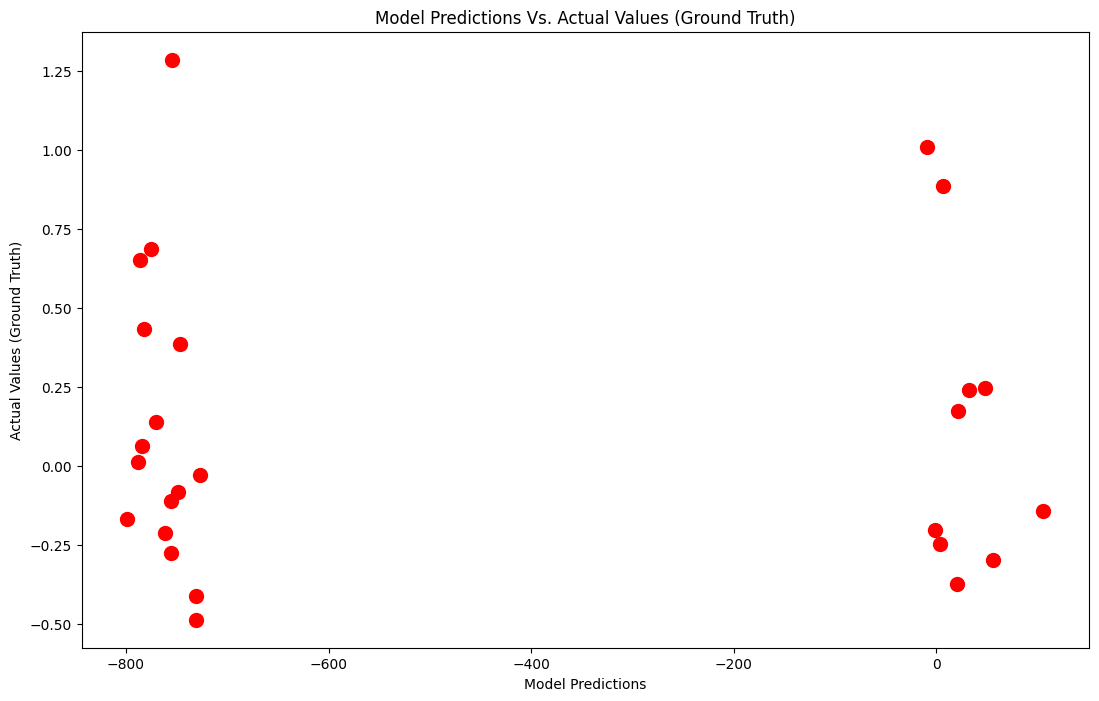

In [166]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

In [172]:
# Display the trained model Y-intercept
print(linear_regression_model.intercept_)

# Display the estimated coefficients for the linear regression problem
#print(linear_regression_model.coef_)

-75.24932285083997


In [168]:
# Decision tress + random ensembler regression based regression analysis

In [169]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
# Train a Random Forest Regression model
# n_estimators: represents the number of trees in the forest
# max_depth: represents the maximum depth of the tree
random_forest_model = RandomForestRegressor(n_estimators = 5, max_depth = 10);
random_forest_model.fit(X_train, y_train);

In [170]:
# Evaluate trained Random Forest Regression model
y_predict = random_forest_model.predict(X_test)

In [171]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE)

Root Mean Squared Error (RMSE) = 0.33392330299228173 
Mean Squared Error (MSE) = 0.11150477228127519 
Mean Absolute Error (MAE) = 0.21004497294615382


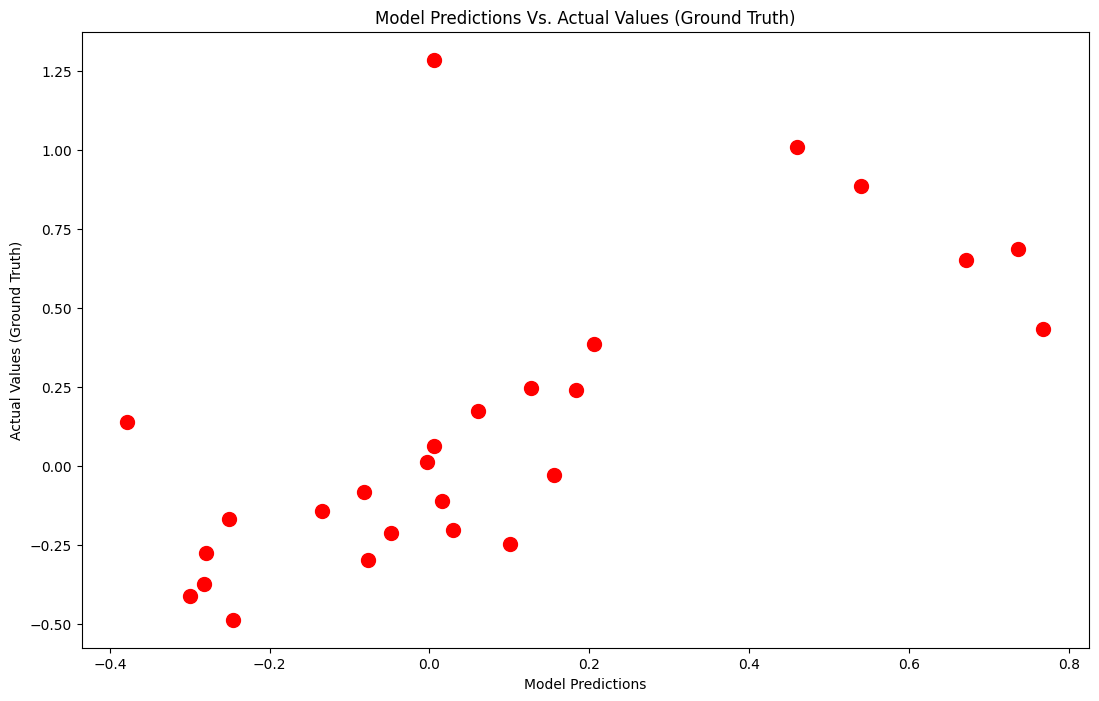

In [173]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');